In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import random


pd.set_option('display.max_columns', None)

In [2]:
file_path = "C:/Users/vinit/Downloads/Analytics Showdown Data (Koolboks).xlsx"

clients_accounts = pd.read_excel(file_path, sheet_name='Clients_Accounts')
payments = pd.read_excel(file_path, sheet_name='Payments')
pricing_groups = pd.read_excel(file_path, sheet_name='Pricing_Groups')

### Cleaning

In [3]:
#merge Clients_Accounts with Payments on 'account_qid'
clients_payments_merged = pd.merge(clients_accounts, payments, on='account_qid', how='left')

#merge the result with Pricing_Groups on 'group_qid'
full_data = pd.merge(clients_payments_merged, pricing_groups, on='group_qid', how='left')

In [4]:
#select columns with '_x' suffix (exclude duplicate columns that were created during the merging process)
columns_to_keep = [col for col in full_data.columns if not col.endswith('_y')]

# Rename '_x' suffix columns by removing the '_x' (dictionary, mapping)
renamed_columns = {col: col[:-2] for col in columns_to_keep if col.endswith('_x')}

#select only the columns in columns_to_keep & reanme the columns that end with '_x' to their original names
full_data = full_data[columns_to_keep].rename(columns=renamed_columns)

In [5]:
df = pd.DataFrame(full_data)
df.head()

,account_qid,group_name,product,product_size,group_qid,billing_model,currency,down_payment,down_payment_days_included,minimum_payment,full_price,payment_amount_per_period,payment_period_in_days,nominal_term_days,registration_date,total_paid,status,cumulative_days_disabled,latest_payment_date,days_to_cutoff,payment_due_date,state,lga,geolocation,gender,client_date_of_birth,occupation,business_type,business_size,monthly_generated_income,lead_source,product_use,payment_qid,amount,effective_date,is_reversed,Term
0,AC10221112,538L Maxi Battery (Tubular) Integrated Freezer...,538L Non-PAYGO,538L,GR194901,PAYG,NGN,290000.0,30.0,104490.0,2693270.0,104490.0,30.0,690.0,2024-03-25,290000.0,Enabled,0,2024-03-25,22.0,2024-04-24,Zamfara,Zurmi,"6.5687484,3.239979",Male,1977-07-22,Merchant (Trade),Beverages Dealer,Medium,"400,001 – 500,000",Other,Commercial,PA725948360,290000.0,2024-03-25,False,NaN
1,AC10221095,538L Maxi Battery (Tubular) Integrated Freezer...,538L Non-PAYGO,538L,GR194901,PAYG,NGN,290000.0,30.0,104490.0,2693270.0,104490.0,30.0,690.0,2024-03-25,290000.0,Enabled,0,2024-03-25,22.0,2024-04-24,Lagos,Badagry,"6.6002049,3.3395032",Female,1979-09-30,Merchant (Trade),Restaurants/Bar,Medium,"100,001 – 150,000",DSA,Commercial,PA725948024,290000.0,2024-03-25,False,NaN
2,AC10221072,195L Koolboks Freezer Alone (Ice maker) - 11 M...,195L Icemaker Non-Paygo,195L,GR194809,PAYG,NGN,290150.0,30.0,62460.0,977210.0,62460.0,30.0,330.0,2024-03-25,290200.0,Enabled,0,2024-03-25,22.0,2024-04-24,Ogun,Ifo,"6.55208,3.38862",Male,1982-06-22,Merchant (Trade),Ice Block Seller,Medium,"300,001 – 400,000",Referral,Domestic,PA725947637,290200.0,2024-03-25,False,NaN
3,AC10221048,538L Midi Battery (100Ah) Integrated Freezer +...,538L Non-PAYGO,538L,GR194917,PAYG,NGN,291000.0,30.0,104550.0,2695650.0,104550.0,30.0,690.0,2024-03-25,291000.0,Enabled,0,2024-03-25,22.0,2024-04-24,Lagos,Lagos Island,"6.4258192,2.9939643",Female,1976-12-26,Merchant (Trade),Frozen Food Seller,Medium,"50,000 and Below",Referral,Commercial,PA725947292,291000.0,2024-03-25,False,NaN
4,AC10220723,208L Maxi Battery Integrated Freezer + 3 Solar...,208L Non-PAYGO,208L,GR194957,PAYG,NGN,232000.0,30.0,83470.0,2151810.0,83470.0,30.0,690.0,2024-03-25,232000.0,Enabled,0,2024-03-25,22.0,2024-04-24,Edo,Ovia South West,"6.6003293,3.3394381",Female,1980-09-16,Health and Social Work,Others,Medium,"100,001 – 150,000",Other,Commercial,PA725940499,232000.0,2024-03-25,False,NaN


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16153 entries, 0 to 16152
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   account_qid                 16153 non-null  object        
 1   group_name                  16153 non-null  object        
 2   product                     16153 non-null  object        
 3   product_size                16153 non-null  object        
 4   group_qid                   16153 non-null  object        
 5   billing_model               16153 non-null  object        
 6   currency                    16153 non-null  object        
 7   down_payment                16153 non-null  float64       
 8   down_payment_days_included  12856 non-null  float64       
 9   minimum_payment             14843 non-null  float64       
 10  full_price                  16153 non-null  float64       
 11  payment_amount_per_period   14843 non-null  float64   

In [7]:
#calculate the threshold for 50% missing values
threshold = len(df) * 0.5

#remove columns with more than 50% missing values
df = df.loc[:, df.isnull().sum() <= threshold]

#ensures empty strings are treated as missing values before the threshold check
df.replace("", pd.NA, inplace=True)

#recalculate the threshold and remove columns with more than 50% NaN values
df = df.loc[:, df.isnull().sum() <= threshold]

#replace remaining missing values with the mean
df.fillna(df.mean(), inplace=True)

C:\Users\vinit\AppData\Local\Temp\ipykernel_12664\3942762100.py:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
C:\Users\vinit\AppData\Local\Temp\ipykernel_12664\3942762100.py:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [8]:
df.columns

Index(['account_qid', 'group_name', 'product', 'product_size', 'group_qid',
       'billing_model', 'currency', 'down_payment',
       'down_payment_days_included', 'minimum_payment', 'full_price',
       'payment_amount_per_period', 'payment_period_in_days',
       'nominal_term_days', 'registration_date', 'total_paid', 'status',
       'cumulative_days_disabled', 'latest_payment_date', 'days_to_cutoff',
       'payment_due_date', 'state', 'lga', 'geolocation', 'gender',
       'occupation', 'business_type', 'monthly_generated_income',
       'payment_qid', 'amount', 'effective_date', 'is_reversed'],
      dtype='object')

In [9]:
#handle missing values if any
df = df.fillna(df.mean())

C:\Users\vinit\AppData\Local\Temp\ipykernel_12664\3924100013.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())
C:\Users\vinit\AppData\Local\Temp\ipykernel_12664\3924100013.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16153 entries, 0 to 16152
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   account_qid                 16153 non-null  object        
 1   group_name                  16153 non-null  object        
 2   product                     16153 non-null  object        
 3   product_size                16153 non-null  object        
 4   group_qid                   16153 non-null  object        
 5   billing_model               16153 non-null  object        
 6   currency                    16153 non-null  object        
 7   down_payment                16153 non-null  float64       
 8   down_payment_days_included  16153 non-null  float64       
 9   minimum_payment             16153 non-null  float64       
 10  full_price                  16153 non-null  float64       
 11  payment_amount_per_period   16153 non-null  float64   

# EDA

In [11]:
# Summarize the central tendency, dispersion, and shape of dataset’s distribution
print(df.describe())

# Frequency counts for categorical variables
print(df['status'].value_counts())
print(df['billing_model'].value_counts())


       down_payment  down_payment_days_included  minimum_payment  \
count  1.615300e+04                16153.000000     1.615300e+04   
mean   2.336901e+05                   22.599175     5.195966e+04   
std    2.558734e+05                   17.582265     6.008841e+04   
min    0.000000e+00                    0.000000     1.000000e+00   
25%    1.115822e+05                   22.599175     2.682200e+04   
50%    1.527410e+05                   30.000000     4.393300e+04   
75%    2.110000e+05                   30.000000     5.873249e+04   
max    2.748000e+06                  350.000000     1.447930e+06   

         full_price  payment_amount_per_period  payment_period_in_days  \
count  1.615300e+04               1.615300e+04            16153.000000   
mean   9.886634e+05               5.924927e+04               28.426960   
std    5.081896e+05               6.334965e+04                5.132044   
min    9.500000e+04               2.000000e+03                7.000000   
25%    7.021100e+

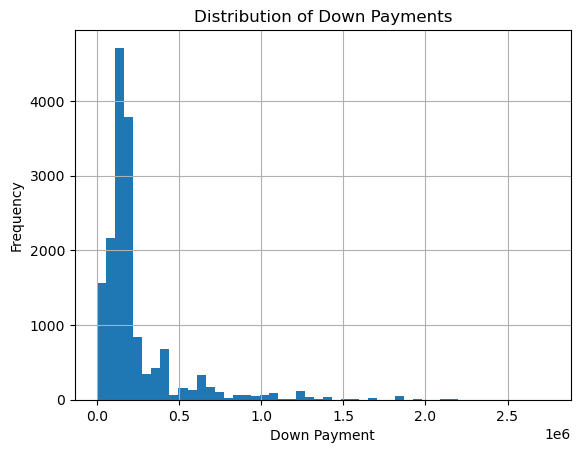

In [12]:
# Histograms for continuous variables
df['down_payment'].hist(bins=50)
plt.title('Distribution of Down Payments')
plt.xlabel('Down Payment')
plt.ylabel('Frequency')
plt.show()



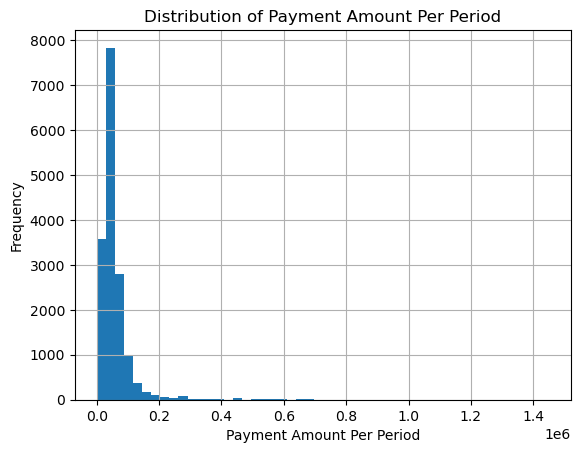

In [13]:
df['payment_amount_per_period'].hist(bins=50)
plt.title('Distribution of Payment Amount Per Period')
plt.xlabel('Payment Amount Per Period')
plt.ylabel('Frequency')
plt.show()


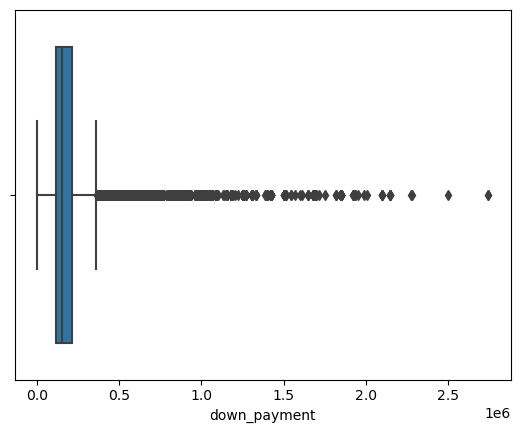

In [14]:
# Box plots for detecting outliers
sns.boxplot(x=df['down_payment'])
plt.show()

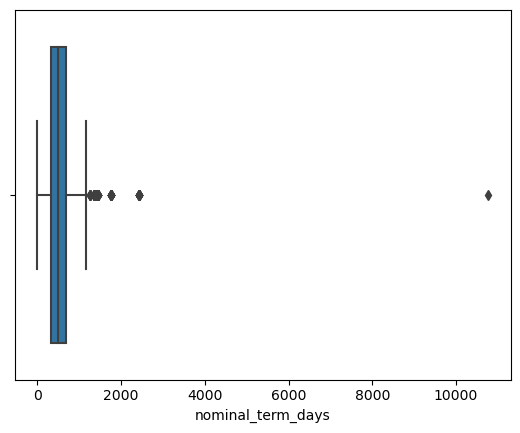

In [15]:

sns.boxplot(x=df['nominal_term_days'])
plt.show()

C:\Users\vinit\AppData\Local\Temp\ipykernel_12664\2116998949.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


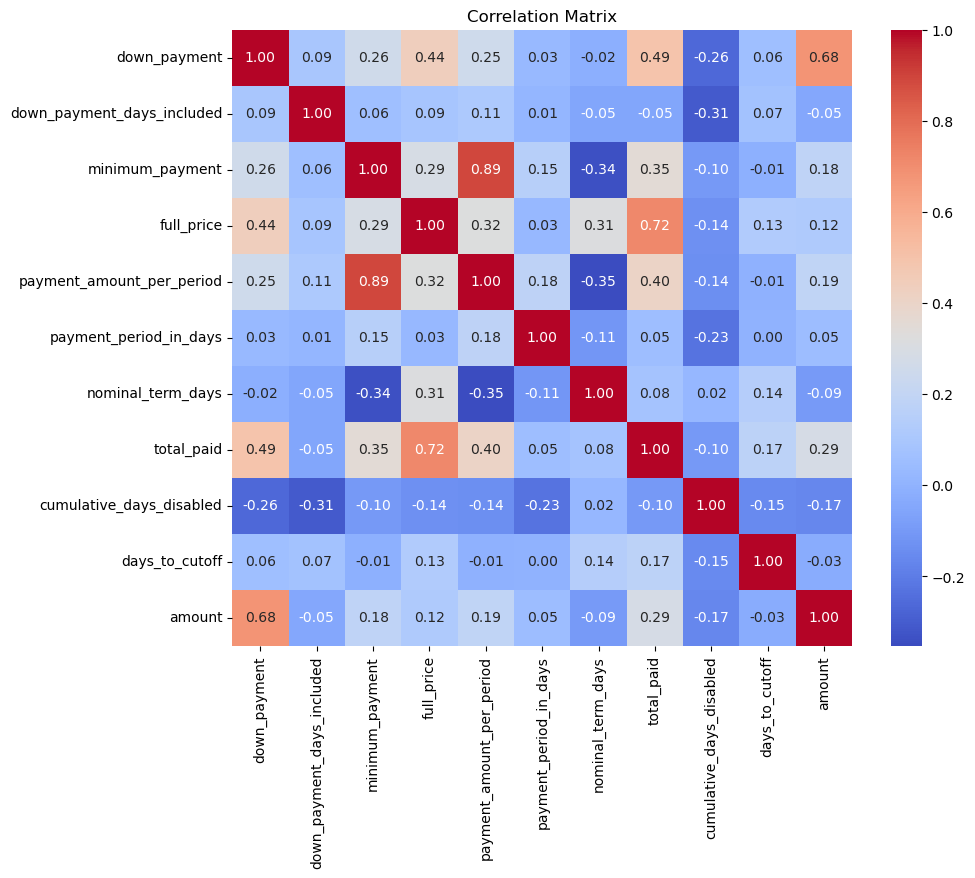

In [16]:
# Correlation matrix
correlation = df.corr()

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


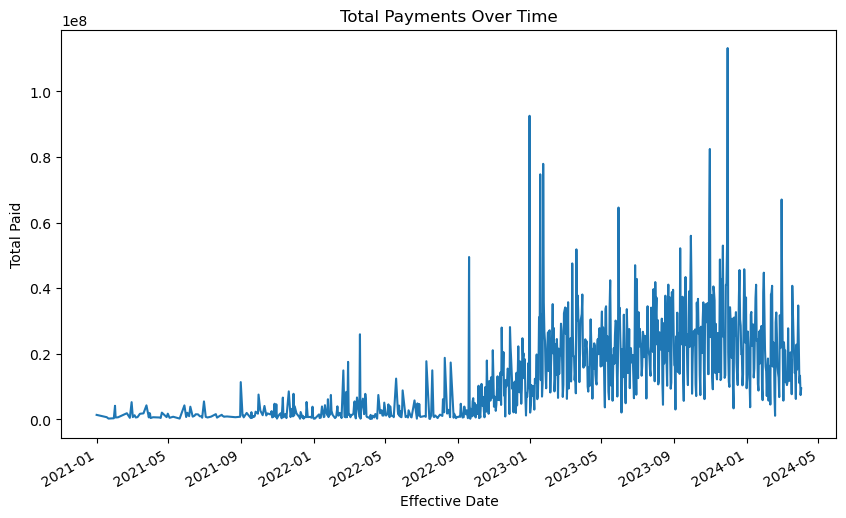

In [17]:
# Time Series plot for payment behaviors
plt.figure(figsize=(10, 6))
df.groupby('effective_date')['total_paid'].sum().plot()
plt.title('Total Payments Over Time')
plt.xlabel('Effective Date')
plt.ylabel('Total Paid')
plt.show()


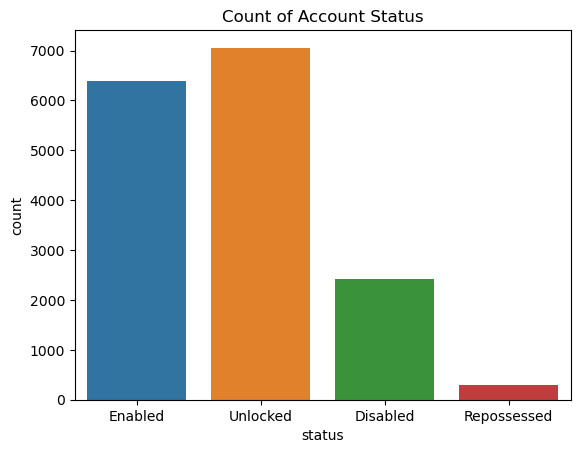

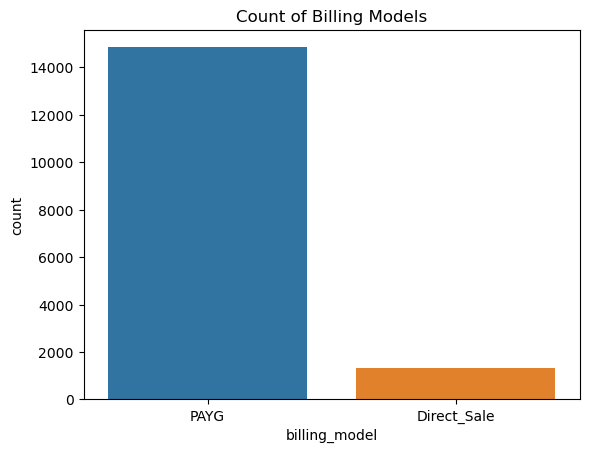

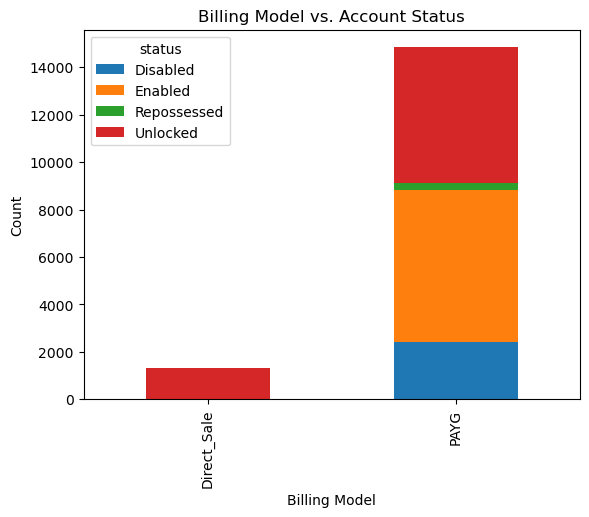

In [18]:
# Bar charts for categorical data
sns.countplot(x='status', data=df)
plt.title('Count of Account Status')
plt.show()

sns.countplot(x='billing_model', data=df)
plt.title('Count of Billing Models')
plt.show()

# Cross tabulation
ctab = pd.crosstab(df['billing_model'], df['status'])
ctab.plot(kind='bar', stacked=True)
plt.title('Billing Model vs. Account Status')
plt.xlabel('Billing Model')
plt.ylabel('Count')
plt.show()


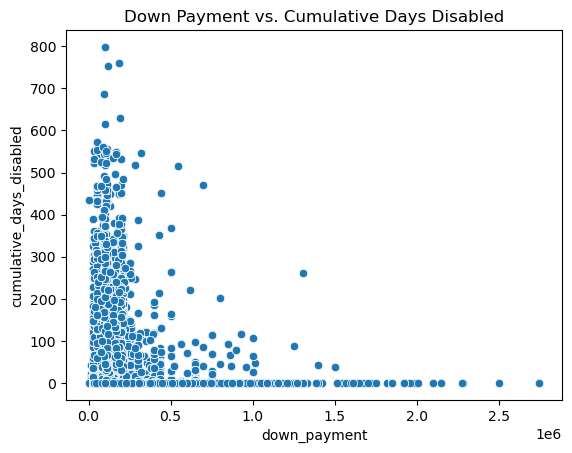

In [19]:
# Scatter plots
sns.scatterplot(x='down_payment', y='cumulative_days_disabled', data=df)
plt.title('Down Payment vs. Cumulative Days Disabled')
plt.show()



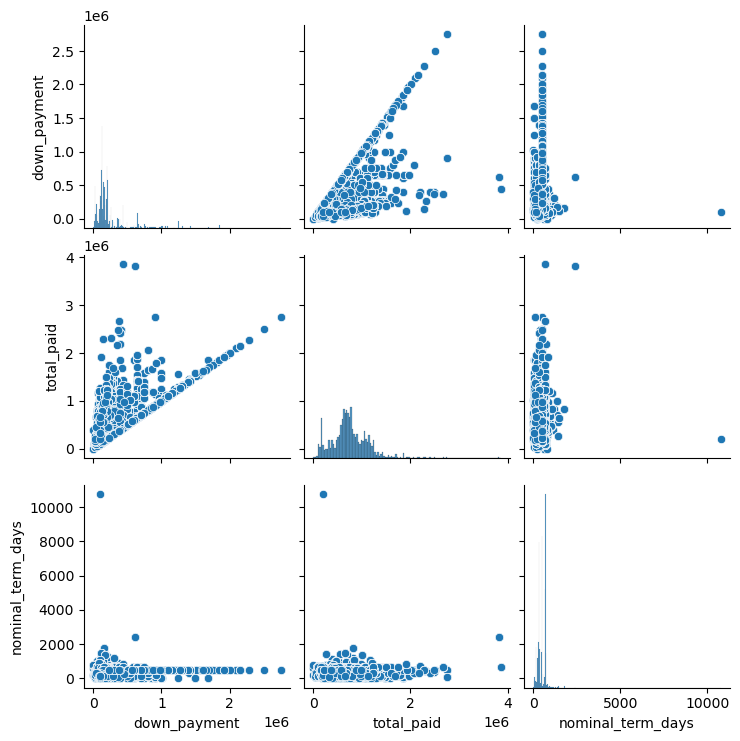

In [20]:
# Pair plots of selected variables
sns.pairplot(df[['down_payment', 'total_paid', 'nominal_term_days', 'status']])
plt.show()

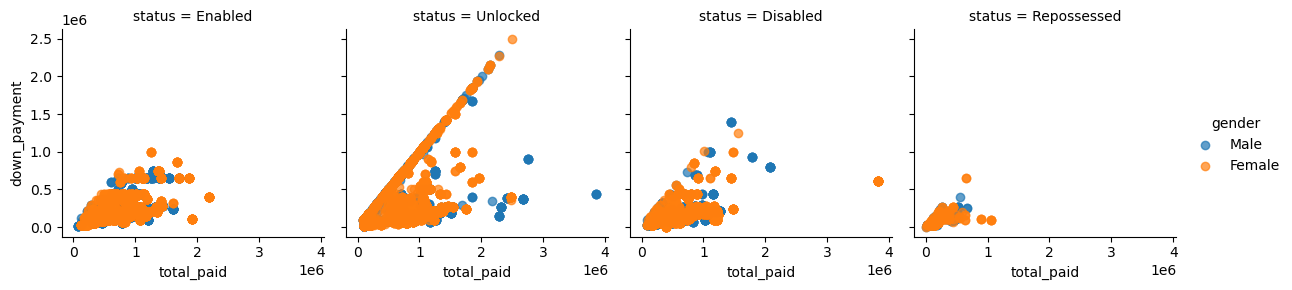

In [21]:
# Facet grids
g = sns.FacetGrid(df, col='status', hue='gender')
g.map(plt.scatter, 'total_paid', 'down_payment', alpha=.7)
g.add_legend()
plt.show()


# Feature Engineering

In [22]:
from datetime import datetime

# Example: Adding age of account
df['age_of_account_days'] = (pd.to_datetime('today') - df['registration_date']).dt.days

# Example: Adding payment ratio
df['payment_ratio'] = df['total_paid'] / df['full_price']


In [23]:
df1 = df.copy()

In [24]:
# Display the data types of all columns
print(df1.dtypes)

# Identify numerical columns
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_columns)

# Identify categorical columns
categorical_columns = df1.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)


account_qid                           object
group_name                            object
product                               object
product_size                          object
group_qid                             object
billing_model                         object
currency                              object
down_payment                         float64
down_payment_days_included           float64
minimum_payment                      float64
full_price                           float64
payment_amount_per_period            float64
payment_period_in_days               float64
nominal_term_days                    float64
registration_date             datetime64[ns]
total_paid                           float64
status                                object
cumulative_days_disabled               int64
latest_payment_date           datetime64[ns]
days_to_cutoff                       float64
payment_due_date              datetime64[ns]
state                                 object
lga       

In [25]:
# Convert datetime columns to more useful numeric features
df1['registration_year'] = df1['registration_date'].dt.year
df1['registration_month'] = df1['registration_date'].dt.month
df1['registration_day'] = df1['registration_date'].dt.day

df1['latest_payment_year'] = df1['latest_payment_date'].dt.year
df1['latest_payment_month'] = df1['latest_payment_date'].dt.month
df1['latest_payment_day'] = df1['latest_payment_date'].dt.day

df1['payment_due_year'] = df1['payment_due_date'].dt.year
df1['payment_due_month'] = df1['payment_due_date'].dt.month
df1['payment_due_day'] = df1['payment_due_date'].dt.day

df1['effective_year'] = df1['effective_date'].dt.year
df1['effective_month'] = df1['effective_date'].dt.month
df1['effective_day'] = df1['effective_date'].dt.day

# After adding these columns, drop the original datetime columns
df1.drop(['registration_date', 'latest_payment_date', 'payment_due_date', 'effective_date'], axis=1, inplace=True)



In [26]:
# Retain the original 'account_qid' before encoding
original_account_qid = df1['account_qid'].copy()
original_account_qid

0        AC10221112
1        AC10221095
2        AC10221072
3        AC10221048
4        AC10220723
            ...    
16148     AC6961460
16149     AC7068839
16150     AC6961459
16151     AC7068816
16152     AC8755610
Name: account_qid, Length: 16153, dtype: object

In [27]:
import pandas as pd

# One-hot encode categorical variables with fewer unique values
df1 = pd.get_dummies(df1, columns=[
    'billing_model', 'currency', 'state', 'gender', 'occupation', 'business_type', 'is_reversed', 'lga', 'geolocation'
])

# Optionally, for high cardinality categorical variables like 'account_qid', consider label encoding or feature hashing:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['account_qid'] = le.fit_transform(df1['account_qid'])
df1['group_name'] = le.fit_transform(df1['group_name'])
df1['product'] = le.fit_transform(df1['product'])
df1['product_size'] = le.fit_transform(df1['product_size'])
df1['group_qid'] = le.fit_transform(df1['group_qid'])
df1['monthly_generated_income'] = le.fit_transform(df1['monthly_generated_income'])
df1['payment_qid'] = le.fit_transform(df1['payment_qid'])


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# List of numerical columns to scale
numerical_cols = ['down_payment', 'down_payment_days_included', 'minimum_payment',
                  'full_price', 'payment_amount_per_period', 'payment_period_in_days',
                  'nominal_term_days', 'total_paid', 'cumulative_days_disabled',
                  'days_to_cutoff', 'amount', 'age_of_account_days', 'payment_ratio']

df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])


In [29]:
# Checking for NaN values in each column
nan_counts = df1.isnull().sum()
print(nan_counts[nan_counts > 0])  # This will print only columns that have NaN values and their counts

latest_payment_year        2
latest_payment_month       2
latest_payment_day         2
payment_due_year        7056
payment_due_month       7056
payment_due_day         7056
effective_year             2
effective_month            2
effective_day              2
dtype: int64


In [30]:
# Fill missing values in specific columns with the mean
mean_columns = ['latest_payment_year', 'latest_payment_month', 'latest_payment_day', 
                'effective_year', 'effective_month', 'effective_day']

for col in mean_columns:
    df1[col] = df1[col].fillna(df1[col].mean())

# Fill missing values in payment_due_year, payment_due_month, and payment_due_day with -1
df1['payment_due_year'] = df1['payment_due_year'].fillna(-1)
df1['payment_due_month'] = df1['payment_due_month'].fillna(-1)
df1['payment_due_day'] = df1['payment_due_day'].fillna(-1)

# Verify that there are no more missing values
nan_counts = df1.isnull().sum()
print(nan_counts[nan_counts > 0])  # This should print an empty series if there are no more NaN values


Series([], dtype: int64)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Preparing the data
X = df1.drop('status', axis=1)
y = df1['status'].apply(lambda x: 1 if x in ['Disabled', 'Repossessed'] else 0)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the Logistic Regression model with increased max_iter
logistic_model = LogisticRegression(random_state=42, max_iter=2000, solver='liblinear')
logistic_model.fit(X_train, y_train)

# Predict probabilities for the test set
logistic_probabilities_test = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate the Logistic Regression model
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, logistic_model.predict(X_test)))
print("ROC-AUC:", roc_auc_score(y_test, logistic_probabilities_test))
print("Precision:", precision_score(y_test, logistic_model.predict(X_test)))
print("Recall:", recall_score(y_test, logistic_model.predict(X_test)))
print("F1 Score:", f1_score(y_test, logistic_model.predict(X_test)))
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_model.predict(X_test)))

# Predict probabilities for the entire dataset
all_probabilities = logistic_model.predict_proba(X)[:, 1]

# Create a DataFrame with the original 'account_qid' and the corresponding default probabilities
report_df = pd.DataFrame({'original_account_qid': original_account_qid, 'default_probability': all_probabilities})

# Display the report DataFrame with the original account_qid values
print(report_df.head())


Logistic Regression Metrics:
Accuracy: 0.9839059114825132
ROC-AUC: 0.997889186358765
Precision: 0.9920792079207921
Recall: 0.912568306010929
F1 Score: 0.9506641366223909
Confusion Matrix:
 [[2678    4]
 [  48  501]]
  original_account_qid  default_probability
0           AC10221112             0.093985
1           AC10221095             0.101204
2           AC10221072             0.146544
3           AC10221048             0.107529
4           AC10220723             0.074719


In [32]:
# Add a new column for default probability in percentage
report_df['default_percentage'] = report_df['default_probability'] * 100

# Display the report DataFrame with the necessary details
report_df


,original_account_qid,default_probability,default_percentage
0,AC10221112,0.093985,9.398463
1,AC10221095,0.101204,10.120440
2,AC10221072,0.146544,14.654398
3,AC10221048,0.107529,10.752901
4,AC10220723,0.074719,7.471946
...,...,...,...
16148,AC6961460,0.000008,0.000804
16149,AC7068839,0.000008,0.000817
16150,AC6961459,0.000009,0.000869
16151,AC7068816,0.000008,0.000818


In [33]:
import numpy as np

# Extract feature importances (coefficients)
feature_importances = np.abs(logistic_model.coef_[0])

# Create a DataFrame for feature importances
features = X.columns
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df)


                                     Feature  Importance
14                            days_to_cutoff    3.788305
27                         payment_due_month    0.983319
13                  cumulative_days_disabled    0.445287
23                       latest_payment_year    0.368784
12                                total_paid    0.265402
...                                      ...         ...
561          geolocation_6.4872802,3.8033709    0.000000
1107  geolocation_7.06686449999999,6.2747734    0.000000
744          geolocation_6.6026596,3.6167146    0.000000
137                                 lga_Efon    0.000000
1289  geolocation_7.37959629999999,3.9674675    0.000000

[1513 rows x 2 columns]


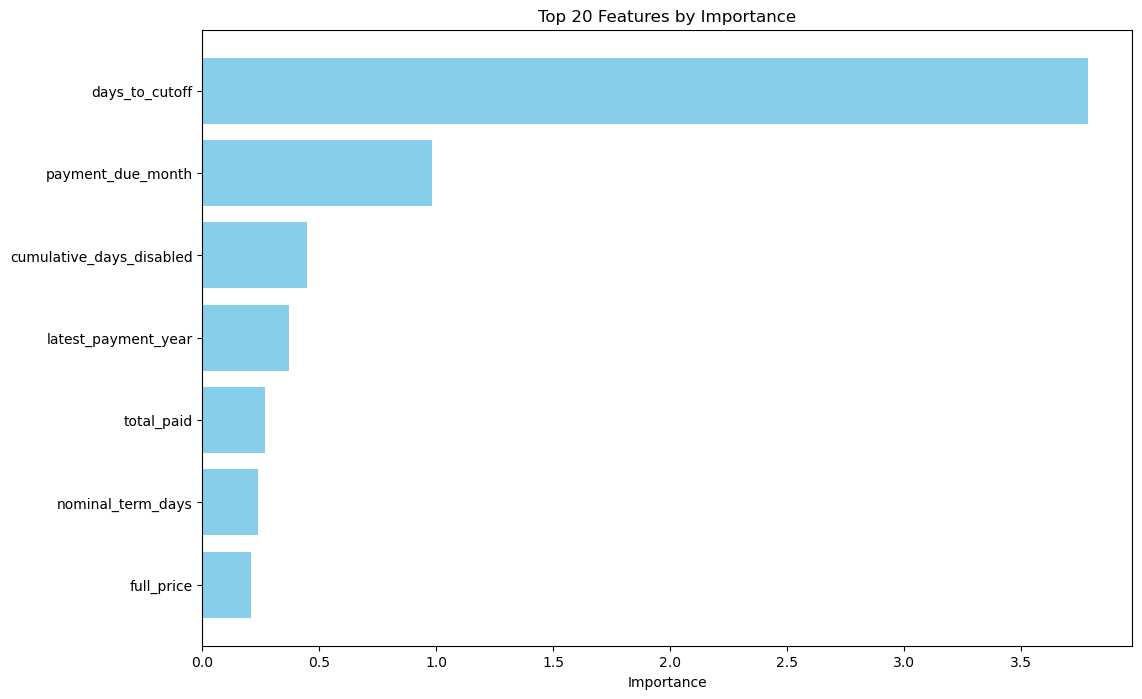

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importances (coefficients)
feature_importances = np.abs(logistic_model.coef_[0])

# Create a DataFrame for feature importances
features = X.columns
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_20_features = feature_importances_df.head(7)

# Create a bar plot to visualize these features
plt.figure(figsize=(12, 8))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Features by Importance')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()


# 2. Default Criteria and Repossession Considerations:

In [35]:
# If df2 was intended to be a copy of df1
df2 = df1.copy()

# Now you can use df2 as a DataFrame
print(df2.dtypes)


account_qid                        int32
group_name                         int32
product                            int32
product_size                       int32
group_qid                          int32
                                   ...  
geolocation_9.0642872,7.3872731    uint8
geolocation_9.11687,7.25321        uint8
geolocation_9.1223979,7.2108551    uint8
geolocation_9.1248293,7.2095075    uint8
geolocation_9.258032,7.3886327     uint8
Length: 1514, dtype: object


In [43]:
import pandas as pd

# Assuming 'df2' is your DataFrame
# List all columns in the DataFrame to verify column names
print("Columns in df2:", df2.columns)

# Check the data types of the relevant columns
print(df2[['latest_payment_year', 'latest_payment_month', 'latest_payment_day', 'payment_due_year', 'payment_due_month', 'payment_due_day']].dtypes)

# Convert the date parts to integers
df2['latest_payment_year'] = df2['latest_payment_year'].astype(int)
df2['latest_payment_month'] = df2['latest_payment_month'].astype(int)
df2['latest_payment_day'] = df2['latest_payment_day'].astype(int)
df2['payment_due_year'] = df2['payment_due_year'].astype(int)
df2['payment_due_month'] = df2['payment_due_month'].astype(int)
df2['payment_due_day'] = df2['payment_due_day'].astype(int)

# Identify rows with invalid date parts
invalid_dates = df2[
    (df2['latest_payment_year'] < 0) |
    (df2['latest_payment_month'] < 1) | (df2['latest_payment_month'] > 12) |
    (df2['latest_payment_day'] < 1) | (df2['latest_payment_day'] > 31) |
    (df2['payment_due_year'] < 0) |
    (df2['payment_due_month'] < 1) | (df2['payment_due_month'] > 12) |
    (df2['payment_due_day'] < 1) | (df2['payment_due_day'] > 31)
]

# Print the invalid rows to investigate
print("Invalid date rows:")
print(invalid_dates)

# Option 1: Remove rows with invalid date parts
df2_cleaned = df2.drop(invalid_dates.index)

# Option 2: Correct the invalid rows manually (example for demonstration)
# For instance, set invalid year, month, or day to a default valid value
# df2.loc[invalid_dates.index, 'latest_payment_year'] = 2000
# df2.loc[invalid_dates.index, 'latest_payment_month'] = 1
# df2.loc[invalid_dates.index, 'latest_payment_day'] = 1
# df2.loc[invalid_dates.index, 'payment_due_year'] = 2000
# df2.loc[invalid_dates.index, 'payment_due_month'] = 1
# df2.loc[invalid_dates.index, 'payment_due_day'] = 1

# Now, create the datetime columns from the cleaned data
df2_cleaned['latest_payment_date'] = pd.to_datetime(df2_cleaned[['latest_payment_year', 'latest_payment_month', 'latest_payment_day']].rename(columns={
    'latest_payment_year': 'year', 'latest_payment_month': 'month', 'latest_payment_day': 'day'}))
df2_cleaned['payment_due_date'] = pd.to_datetime(df2_cleaned[['payment_due_year', 'payment_due_month', 'payment_due_day']].rename(columns={
    'payment_due_year': 'year', 'payment_due_month': 'month', 'payment_due_day': 'day'}))

# Create a column to indicate if the latest payment was missed
df2_cleaned['missed_latest_payment'] = df2_cleaned['latest_payment_date'] > df2_cleaned['payment_due_date']

# Define conditions for classifying a client as in default
df2_cleaned['is_default'] = df2_cleaned['missed_latest_payment']

# Define conditions for repossession or write-off
def check_repossession_or_write_off(row):
    if row['is_default']:
        # Add additional conditions if needed, for example, payment_ratio, total_paid, etc.
        # Example condition: repossession if cumulative_days_disabled is more than 30 days
        if row['cumulative_days_disabled'] > 30:
            return 'Repossession'
        else:
            return 'Write-off'
    return 'None'

# Apply the function to determine repossession or write-off
df2_cleaned['repossession_or_write_off'] = df2_cleaned.apply(check_repossession_or_write_off, axis=1)

# Display the first few rows to verify the new columns
print(df2_cleaned[['latest_payment_date', 'payment_due_date', 'missed_latest_payment', 'is_default', 'repossession_or_write_off']].head())


Columns in df2: Index(['account_qid', 'group_name', 'product', 'product_size', 'group_qid',
       'down_payment', 'down_payment_days_included', 'minimum_payment',
       'full_price', 'payment_amount_per_period',
       ...
       'geolocation_8.8737636,9.5251117', 'geolocation_8.8870464,3.3993751',
       'geolocation_9.0415381,7.50842089999999',
       'geolocation_9.0562646,7.4985259', 'geolocation_9.0642872,7.3872731',
       'geolocation_9.11687,7.25321', 'geolocation_9.1223979,7.2108551',
       'geolocation_9.1248293,7.2095075', 'geolocation_9.258032,7.3886327',
       'latest_payment_date'],
      dtype='object', length=1515)
latest_payment_year     int32
latest_payment_month    int32
latest_payment_day      int32
payment_due_year        int32
payment_due_month       int32
payment_due_day         int32
dtype: object
Invalid date rows:
       account_qid  group_name  product  product_size  group_qid  \
6               38         651       17             8       1954   
7       

  latest_payment_date payment_due_date  missed_latest_payment  is_default  \
0          2024-03-25       2024-04-24                  False       False   
1          2024-03-25       2024-04-24                  False       False   
2          2024-03-25       2024-04-24                  False       False   
3          2024-03-25       2024-04-24                  False       False   
4          2024-03-25       2024-04-24                  False       False   

  repossession_or_write_off  
0                      None  
1                      None  
2                      None  
3                      None  
4                      None  


In [46]:
# Summary report of key metrics
summary_report = {
    'Total Accounts': len(df2_cleaned),
    'Total Defaults': df2_cleaned['is_default'].sum(),
    'Total Repossessions': (df2_cleaned['repossession_or_write_off'] == 'Repossession').sum(),
    'Total Write-offs': (df2_cleaned['repossession_or_write_off'] == 'Write-off').sum(),
    'Default Rate': df2_cleaned['is_default'].mean(),
    'Repossession Rate': (df2_cleaned['repossession_or_write_off'] == 'Repossession').mean(),
    'Write-off Rate': (df2_cleaned['repossession_or_write_off'] == 'Write-off').mean()
}

print("Summary Report:")
for key, value in summary_report.items():
    print(f"{key}: {value}")


Summary Report:
Total Accounts: 9097
Total Defaults: 121
Total Repossessions: 0
Total Write-offs: 121
Default Rate: 0.013301088270858524
Repossession Rate: 0.0
Write-off Rate: 0.013301088270858524


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import random

pd.set_option('display.max_columns', None)

In [2]:
file_path = '//Analytics Showdown Data (Koolboks).xlsx'

clients_accounts = pd.read_excel(file_path, sheet_name='Clients_Accounts')
payments = pd.read_excel(file_path, sheet_name='Payments')
pricing_groups = pd.read_excel(file_path, sheet_name='Pricing_Groups')

### Cleaning

In [3]:
#merge Clients_Accounts with Payments on 'account_qid'
clients_payments_merged = pd.merge(clients_accounts, payments, on='account_qid', how='left')

#merge the result with Pricing_Groups on 'group_qid'
full_data = pd.merge(clients_payments_merged, pricing_groups, on='group_qid', how='left')

In [4]:
#select columns with '_x' suffix (exclude duplicate columns that were created during the merging process)
columns_to_keep = [col for col in full_data.columns if not col.endswith('_y')]

# Rename '_x' suffix columns by removing the '_x' (dictionary, mapping)
renamed_columns = {col: col[:-2] for col in columns_to_keep if col.endswith('_x')}

#select only the columns in columns_to_keep & reanme the columns that end with '_x' to their original names
full_data = full_data[columns_to_keep].rename(columns=renamed_columns)

In [5]:
df3 = pd.DataFrame(full_data)
df3.head()

,account_qid,group_name,product,product_size,group_qid,billing_model,currency,down_payment,down_payment_days_included,minimum_payment,full_price,payment_amount_per_period,payment_period_in_days,nominal_term_days,registration_date,total_paid,status,cumulative_days_disabled,latest_payment_date,days_to_cutoff,payment_due_date,state,lga,geolocation,gender,client_date_of_birth,occupation,business_type,business_size,monthly_generated_income,lead_source,product_use,payment_qid,amount,effective_date,is_reversed,Term
0,AC10221112,538L Maxi Battery (Tubular) Integrated Freezer...,538L Non-PAYGO,538L,GR194901,PAYG,NGN,290000.0,30.0,104490.0,2693270.0,104490.0,30.0,690.0,2024-03-25,290000.0,Enabled,0,2024-03-25,22.0,2024-04-24,Zamfara,Zurmi,"6.5687484,3.239979",Male,1977-07-22,Merchant (Trade),Beverages Dealer,Medium,"400,001 – 500,000",Other,Commercial,PA725948360,290000.0,2024-03-25,False,NaN
1,AC10221095,538L Maxi Battery (Tubular) Integrated Freezer...,538L Non-PAYGO,538L,GR194901,PAYG,NGN,290000.0,30.0,104490.0,2693270.0,104490.0,30.0,690.0,2024-03-25,290000.0,Enabled,0,2024-03-25,22.0,2024-04-24,Lagos,Badagry,"6.6002049,3.3395032",Female,1979-09-30,Merchant (Trade),Restaurants/Bar,Medium,"100,001 – 150,000",DSA,Commercial,PA725948024,290000.0,2024-03-25,False,NaN
2,AC10221072,195L Koolboks Freezer Alone (Ice maker) - 11 M...,195L Icemaker Non-Paygo,195L,GR194809,PAYG,NGN,290150.0,30.0,62460.0,977210.0,62460.0,30.0,330.0,2024-03-25,290200.0,Enabled,0,2024-03-25,22.0,2024-04-24,Ogun,Ifo,"6.55208,3.38862",Male,1982-06-22,Merchant (Trade),Ice Block Seller,Medium,"300,001 – 400,000",Referral,Domestic,PA725947637,290200.0,2024-03-25,False,NaN
3,AC10221048,538L Midi Battery (100Ah) Integrated Freezer +...,538L Non-PAYGO,538L,GR194917,PAYG,NGN,291000.0,30.0,104550.0,2695650.0,104550.0,30.0,690.0,2024-03-25,291000.0,Enabled,0,2024-03-25,22.0,2024-04-24,Lagos,Lagos Island,"6.4258192,2.9939643",Female,1976-12-26,Merchant (Trade),Frozen Food Seller,Medium,"50,000 and Below",Referral,Commercial,PA725947292,291000.0,2024-03-25,False,NaN
4,AC10220723,208L Maxi Battery Integrated Freezer + 3 Solar...,208L Non-PAYGO,208L,GR194957,PAYG,NGN,232000.0,30.0,83470.0,2151810.0,83470.0,30.0,690.0,2024-03-25,232000.0,Enabled,0,2024-03-25,22.0,2024-04-24,Edo,Ovia South West,"6.6003293,3.3394381",Female,1980-09-16,Health and Social Work,Others,Medium,"100,001 – 150,000",Other,Commercial,PA725940499,232000.0,2024-03-25,False,NaN


In [6]:
#calculate the threshold for 50% missing values
threshold = len(df3) * 0.5

#remove columns with more than 50% missing values
df3 = df3.loc[:, df3.isnull().sum() <= threshold]

#ensures empty strings are treated as missing values before the threshold check
df3.replace("", pd.NA, inplace=True)

#recalculate the threshold and remove columns with more than 50% NaN values
df3 = df3.loc[:, df3.isnull().sum() <= threshold]

#replace remaining missing values with the mean
df3.fillna(df3.mean(), inplace=True)

/var/folders/qn/ft4xq4_d74j4v7njvf9v_vb00000gn/T/ipykernel_34397/3389047486.py:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df3.fillna(df3.mean(), inplace=True)
/var/folders/qn/ft4xq4_d74j4v7njvf9v_vb00000gn/T/ipykernel_34397/3389047486.py:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.fillna(df3.mean(), inplace=True)


In [7]:
df3.columns

Index(['account_qid', 'group_name', 'product', 'product_size', 'group_qid',
       'billing_model', 'currency', 'down_payment',
       'down_payment_days_included', 'minimum_payment', 'full_price',
       'payment_amount_per_period', 'payment_period_in_days',
       'nominal_term_days', 'registration_date', 'total_paid', 'status',
       'cumulative_days_disabled', 'latest_payment_date', 'days_to_cutoff',
       'payment_due_date', 'state', 'lga', 'geolocation', 'gender',
       'occupation', 'business_type', 'monthly_generated_income',
       'payment_qid', 'amount', 'effective_date', 'is_reversed'],
      dtype='object')

In [8]:
#handle missing values if any
df3 = df3.fillna(df3.mean())

/var/folders/qn/ft4xq4_d74j4v7njvf9v_vb00000gn/T/ipykernel_34397/516824405.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df3 = df3.fillna(df3.mean())
/var/folders/qn/ft4xq4_d74j4v7njvf9v_vb00000gn/T/ipykernel_34397/516824405.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3 = df3.fillna(df3.mean())


In [9]:
#df3

## Creditworthiness

Work activities done in this section:

1. Correlation Matrix
2. Two models 

- Model 1: Credit risk profiling before customers make a purchase.
- Model 2: Credit risk profiling to predict the likelihood of repossession, which occurs when a customer fails to make payments/installments.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from scipy import stats
import random
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
file_path = '/Users/kerin/Desktop/Spr24 Analytics Showdown/deliv/Analytics_Showdown_Data_Koolboks.xlsx'

clients_accounts = pd.read_excel(file_path, sheet_name='Clients_Accounts')
payments = pd.read_excel(file_path, sheet_name='Payments')
pricing_groups = pd.read_excel(file_path, sheet_name='Pricing_Groups')

#### Join Tables and Remove Duplicates

In [3]:
#merge Clients_Accounts with Payments on 'account_qid'
clients_payments_merged = pd.merge(clients_accounts, payments, on='account_qid', how='left')

#merge the result with Pricing_Groups on 'group_qid'
full_data = pd.merge(clients_payments_merged, pricing_groups, on='group_qid', how='left')

In [4]:
#select columns with '_x' suffix (exclude duplicate columns that were created during the merging process)
columns_to_keep = [col for col in full_data.columns if not col.endswith('_y')]

#rename '_x' suffix columns by removing the '_x' (dictionary, mapping)
renamed_columns = {col: col[:-2] for col in columns_to_keep if col.endswith('_x')}

#select only the columns in columns_to_keep & reanme the columns that end with '_x' to their original names
full_data = full_data[columns_to_keep].rename(columns=renamed_columns)

In [5]:
df3 = pd.DataFrame(full_data)
df3.head()

,account_qid,group_name,product,product_size,group_qid,billing_model,currency,down_payment,down_payment_days_included,minimum_payment,full_price,payment_amount_per_period,payment_period_in_days,nominal_term_days,registration_date,total_paid,status,cumulative_days_disabled,latest_payment_date,days_to_cutoff,payment_due_date,state,lga,geolocation,gender,client_date_of_birth,occupation,business_type,business_size,monthly_generated_income,lead_source,product_use,payment_qid,amount,effective_date,is_reversed,Term
0,AC10221112,538L Maxi Battery (Tubular) Integrated Freezer...,538L Non-PAYGO,538L,GR194901,PAYG,NGN,290000.00,30.00,104490.00,2693270.00,104490.00,30.00,690.00,2024-03-25,290000.00,Enabled,0,2024-03-25,22.00,2024-04-24,Zamfara,Zurmi,"6.5687484,3.239979",Male,1977-07-22,Merchant (Trade),Beverages Dealer,Medium,"400,001 – 500,000",Other,Commercial,PA725948360,290000.00,2024-03-25,False,NaN
1,AC10221095,538L Maxi Battery (Tubular) Integrated Freezer...,538L Non-PAYGO,538L,GR194901,PAYG,NGN,290000.00,30.00,104490.00,2693270.00,104490.00,30.00,690.00,2024-03-25,290000.00,Enabled,0,2024-03-25,22.00,2024-04-24,Lagos,Badagry,"6.6002049,3.3395032",Female,1979-09-30,Merchant (Trade),Restaurants/Bar,Medium,"100,001 – 150,000",DSA,Commercial,PA725948024,290000.00,2024-03-25,False,NaN
2,AC10221072,195L Koolboks Freezer Alone (Ice maker) - 11 M...,195L Icemaker Non-Paygo,195L,GR194809,PAYG,NGN,290150.00,30.00,62460.00,977210.00,62460.00,30.00,330.00,2024-03-25,290200.00,Enabled,0,2024-03-25,22.00,2024-04-24,Ogun,Ifo,"6.55208,3.38862",Male,1982-06-22,Merchant (Trade),Ice Block Seller,Medium,"300,001 – 400,000",Referral,Domestic,PA725947637,290200.00,2024-03-25,False,NaN
3,AC10221048,538L Midi Battery (100Ah) Integrated Freezer +...,538L Non-PAYGO,538L,GR194917,PAYG,NGN,291000.00,30.00,104550.00,2695650.00,104550.00,30.00,690.00,2024-03-25,291000.00,Enabled,0,2024-03-25,22.00,2024-04-24,Lagos,Lagos Island,"6.4258192,2.9939643",Female,1976-12-26,Merchant (Trade),Frozen Food Seller,Medium,"50,000 and Below",Referral,Commercial,PA725947292,291000.00,2024-03-25,False,NaN
4,AC10220723,208L Maxi Battery Integrated Freezer + 3 Solar...,208L Non-PAYGO,208L,GR194957,PAYG,NGN,232000.00,30.00,83470.00,2151810.00,83470.00,30.00,690.00,2024-03-25,232000.00,Enabled,0,2024-03-25,22.00,2024-04-24,Edo,Ovia South West,"6.6003293,3.3394381",Female,1980-09-16,Health and Social Work,Others,Medium,"100,001 – 150,000",Other,Commercial,PA725940499,232000.00,2024-03-25,False,NaN


In [6]:
df3.shape

(16153, 37)

### Correlation Matrix

In [7]:
# corr_matrix = df3.corr()
# plt.figure(figsize=(12, 8), dpi=200)
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

/var/folders/qn/ft4xq4_d74j4v7njvf9v_vb00000gn/T/ipykernel_22181/208751398.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = modified_df.corr()


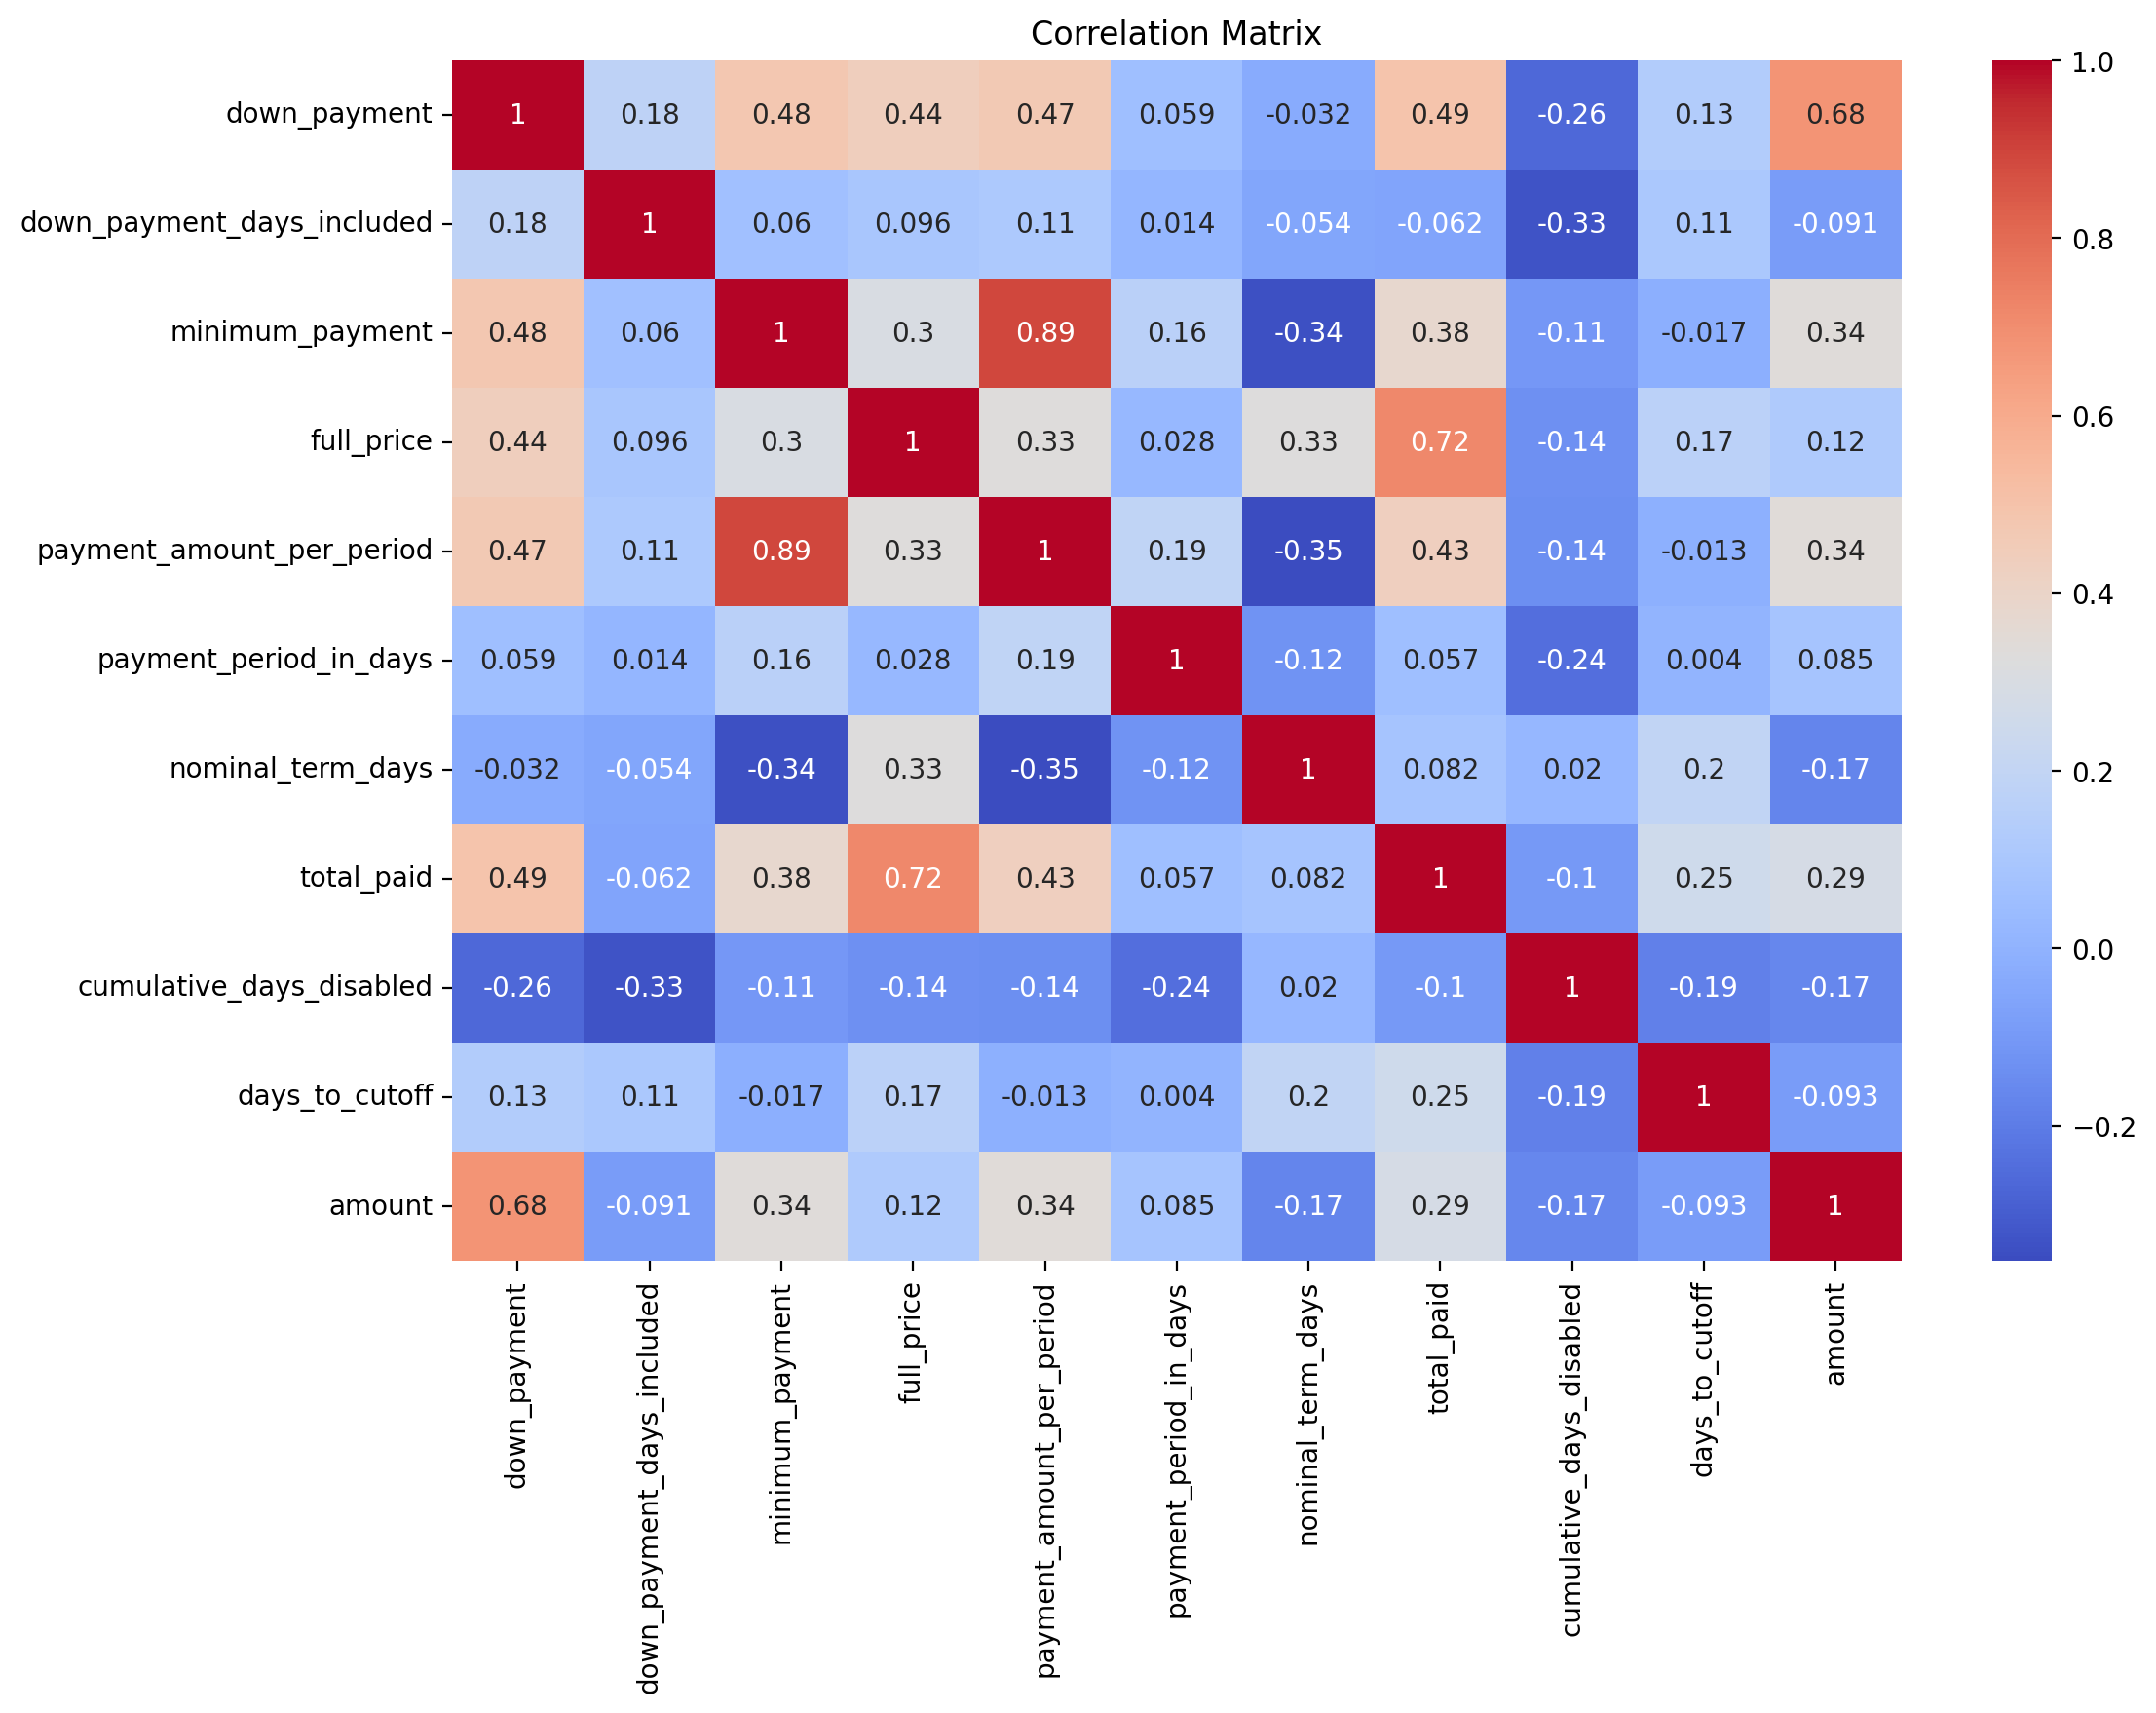

In [8]:
#remove 'Term' column from the DataFrame before computing the correlation
modified_df = df3.drop('Term', axis=1)

corr_matrix = modified_df.corr()
plt.figure(figsize=(12, 8), dpi=200)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Minimum Payment:
* High Correlation with Payment Amount Per Period (0.89): The minimum payment amount is closely aligned with regular payment amounts, reflecting consistency in payment behaviors.

Full Price:
* High Correlation with Total Paid (0.72): Clients who have paid significant portions of their loans typically are involved with higher-priced items, which reflect their robust payment capacity and financial stability.

Amount:
* Moderate Correlation with Down Payment (0.68): The linkage between loan amount and down payment reinforces that higher loan amounts are often associated with substantial initial payments, showing a client’s upfront financial commitment and capability.

### Distribution

In [9]:
df3.dtypes

account_qid                           object
group_name                            object
product                               object
product_size                          object
group_qid                             object
billing_model                         object
currency                              object
down_payment                         float64
down_payment_days_included           float64
minimum_payment                      float64
full_price                           float64
payment_amount_per_period            float64
payment_period_in_days               float64
nominal_term_days                    float64
registration_date             datetime64[ns]
total_paid                           float64
status                                object
cumulative_days_disabled               int64
latest_payment_date           datetime64[ns]
days_to_cutoff                       float64
payment_due_date              datetime64[ns]
state                                 object
lga       

In [10]:
#normalization
scaler = MinMaxScaler()
numerical_columns = df3.select_dtypes(include=['float64', 'int64']).columns
df3[numerical_columns] = scaler.fit_transform(df3[numerical_columns])

/Users/kerin/anaconda3/lib/python3.11/site-packages/sklearn/utils/_array_api.py:472: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/Users/kerin/anaconda3/lib/python3.11/site-packages/sklearn/utils/_array_api.py:489: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


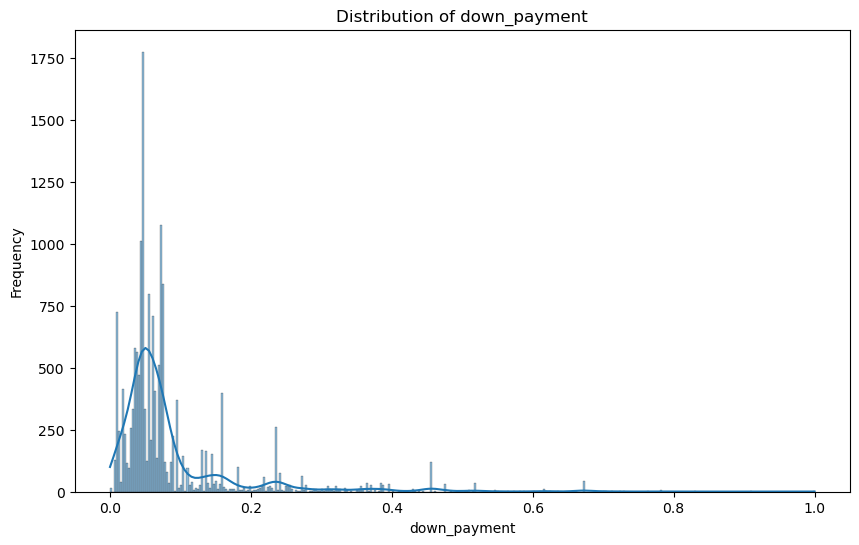

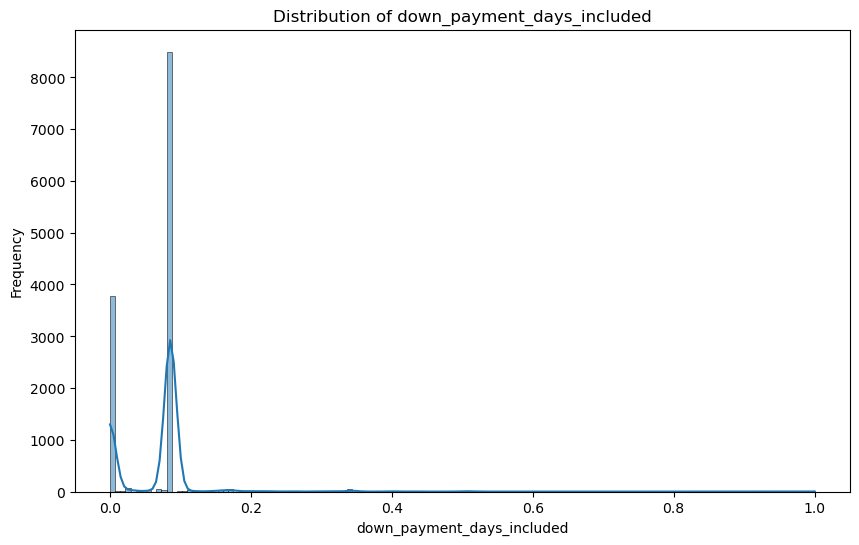

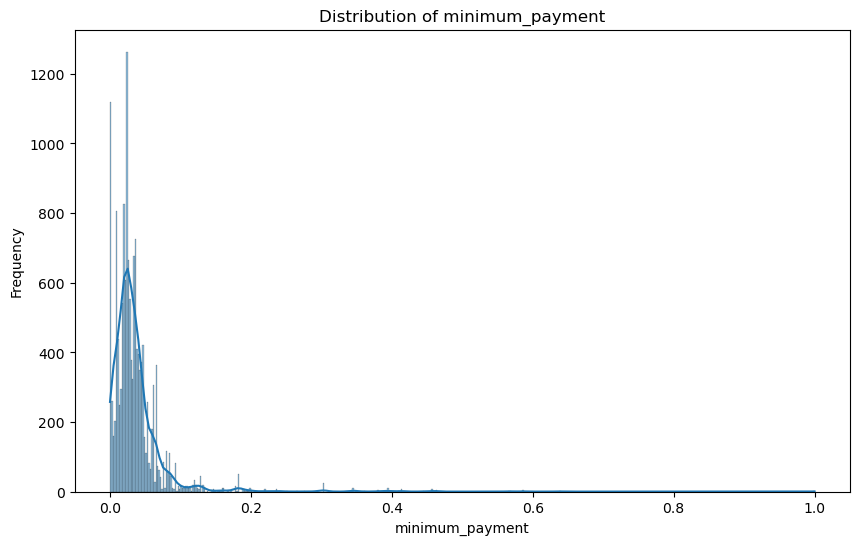

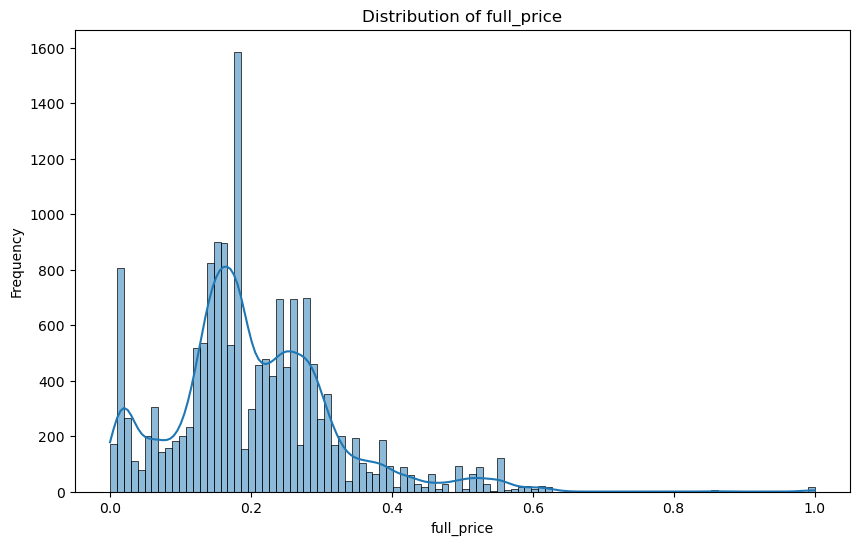

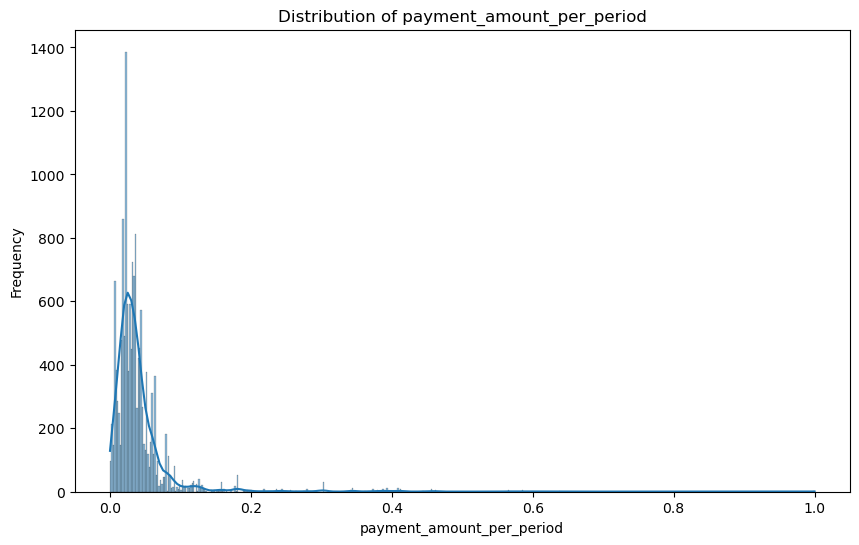

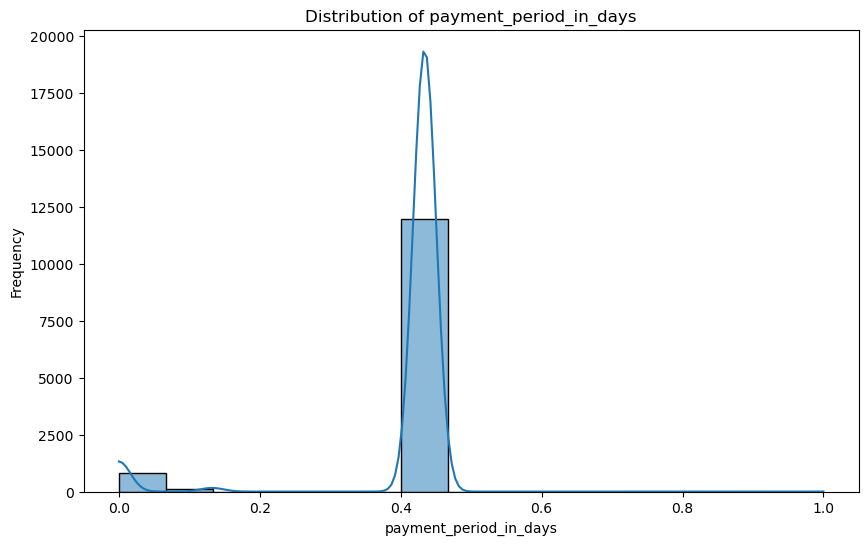

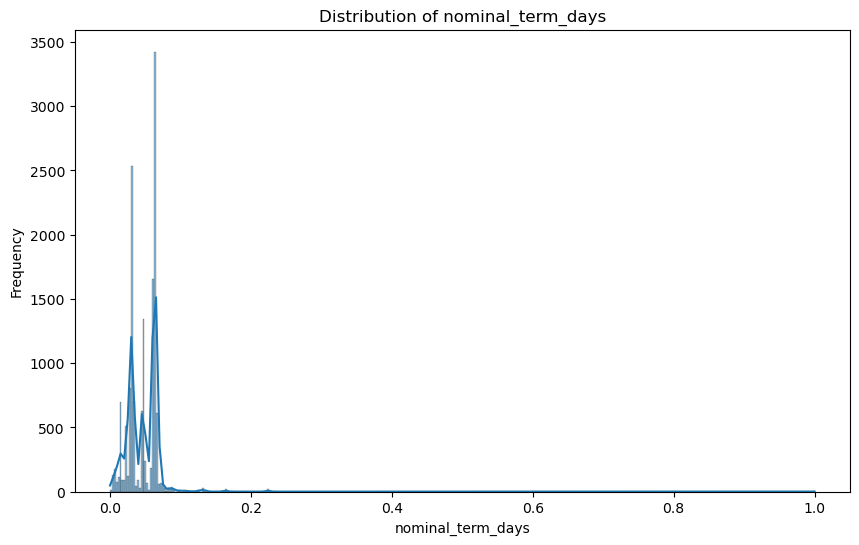

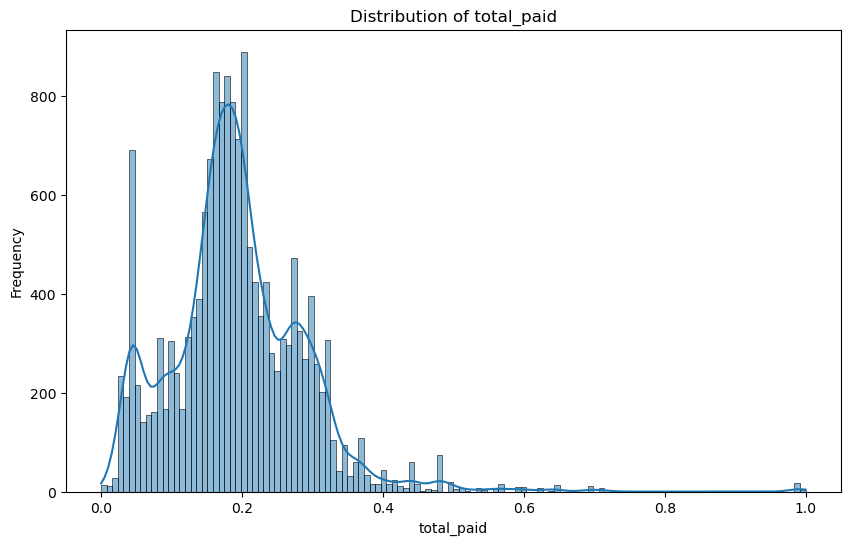

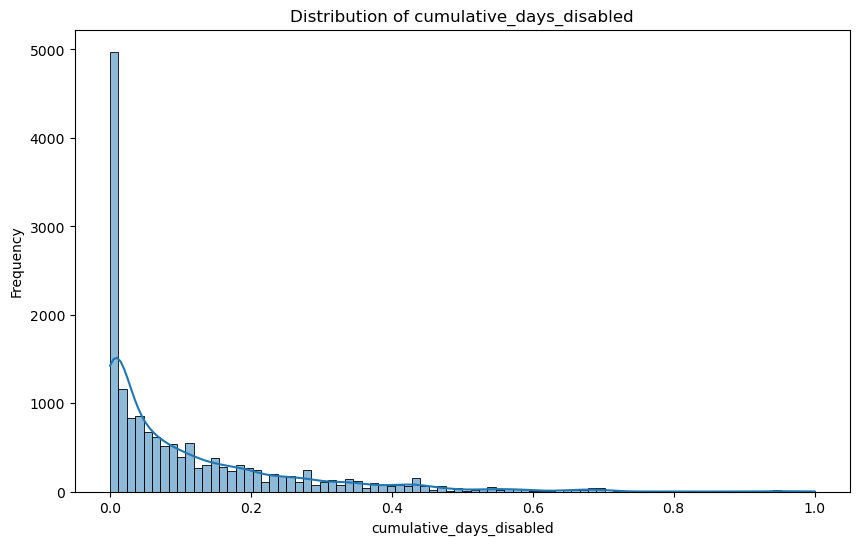

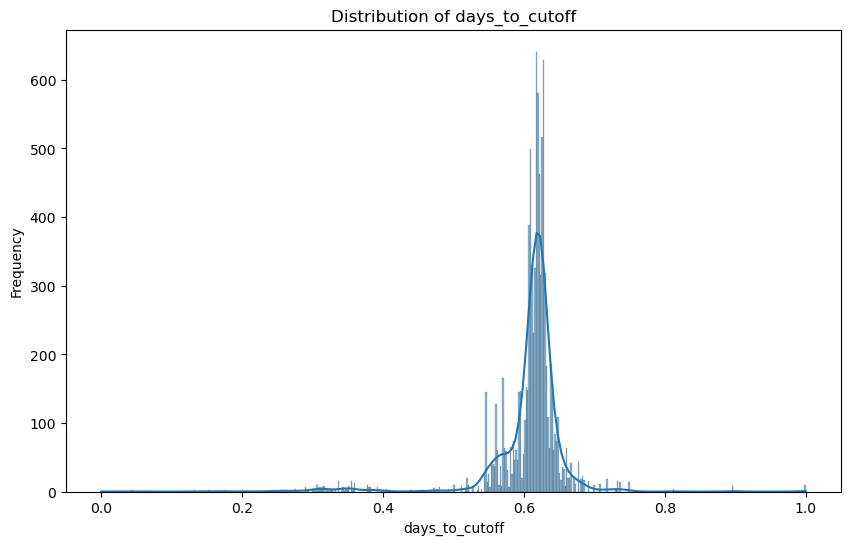

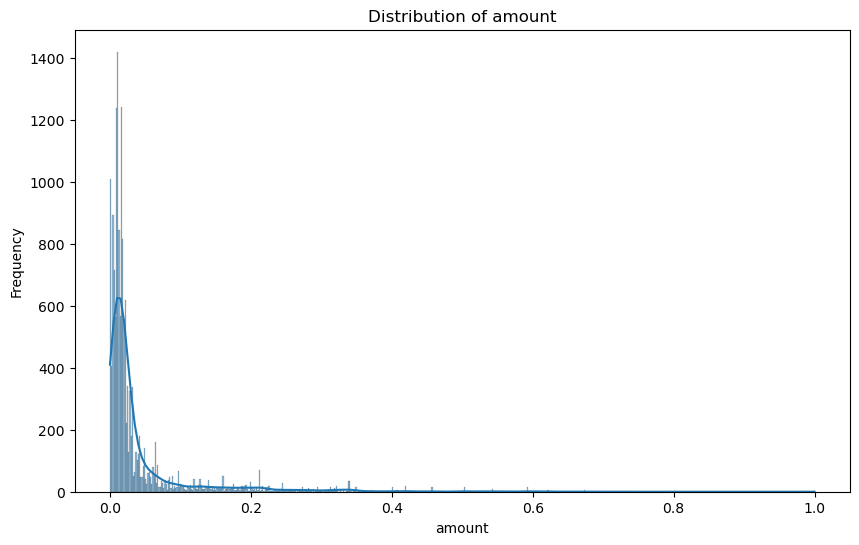

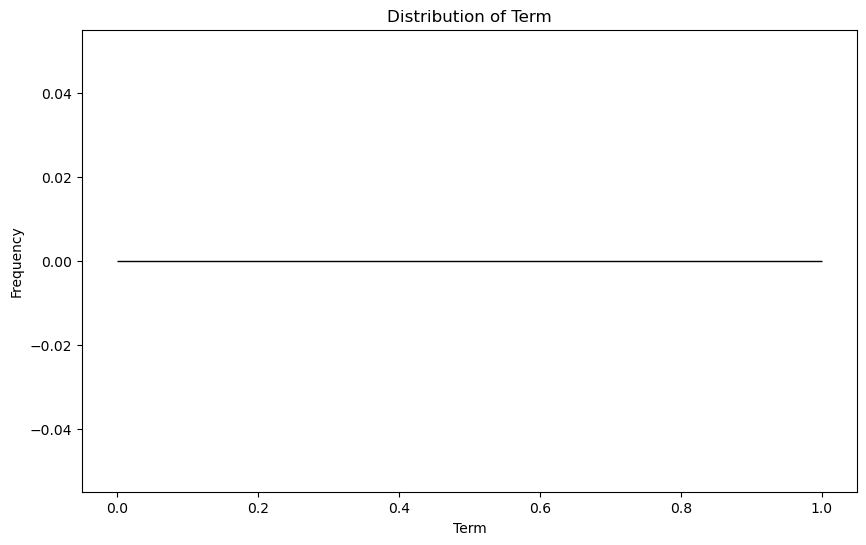

In [11]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df3[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

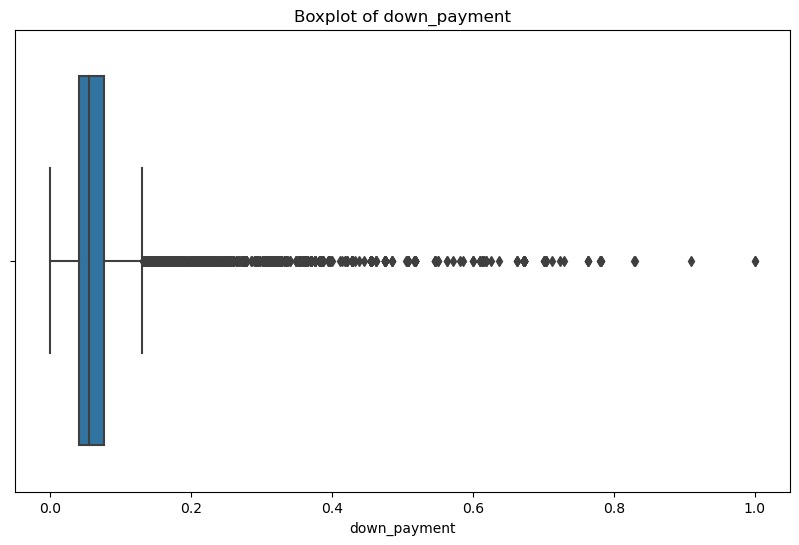

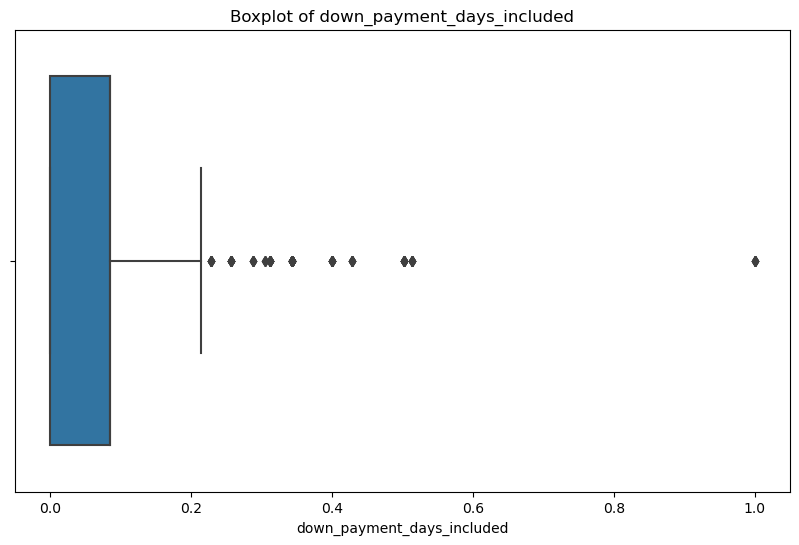

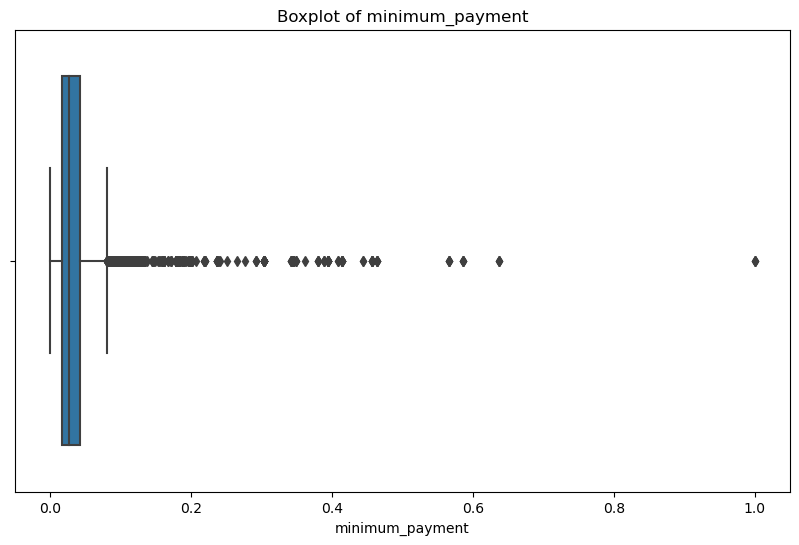

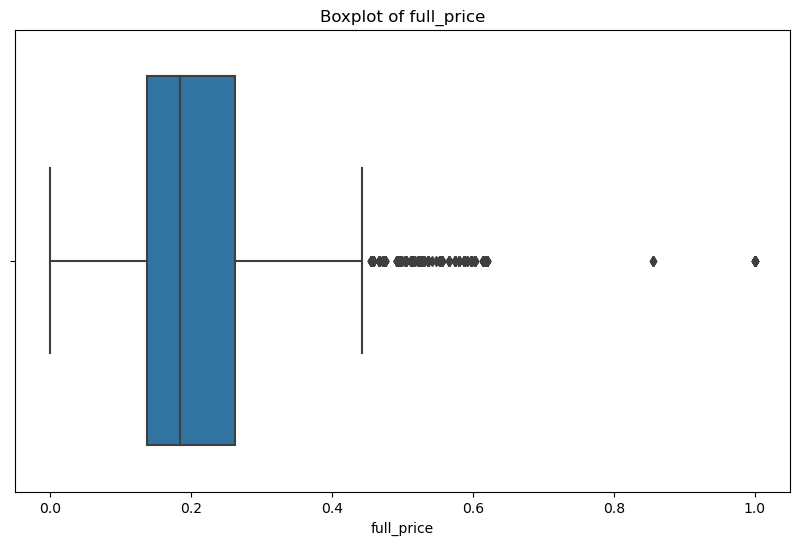

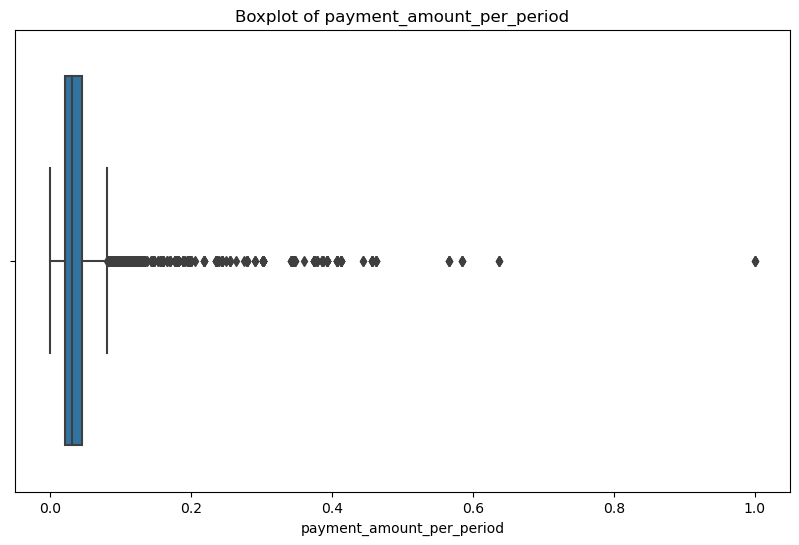

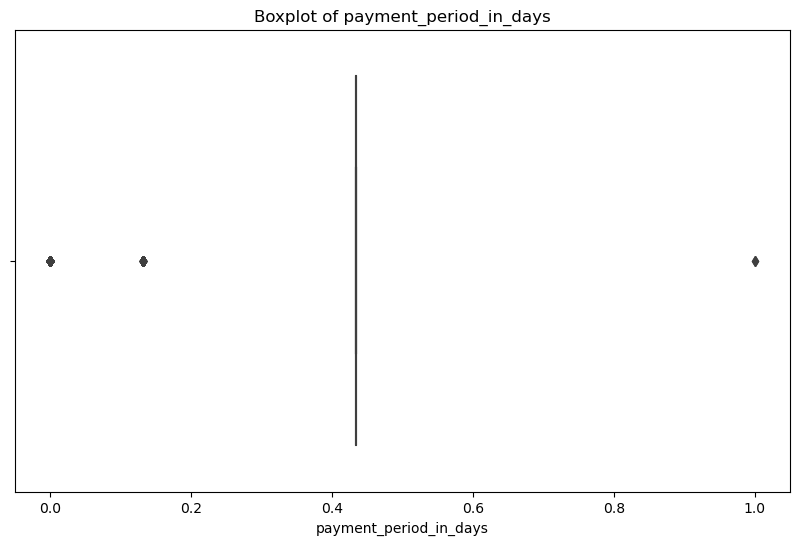

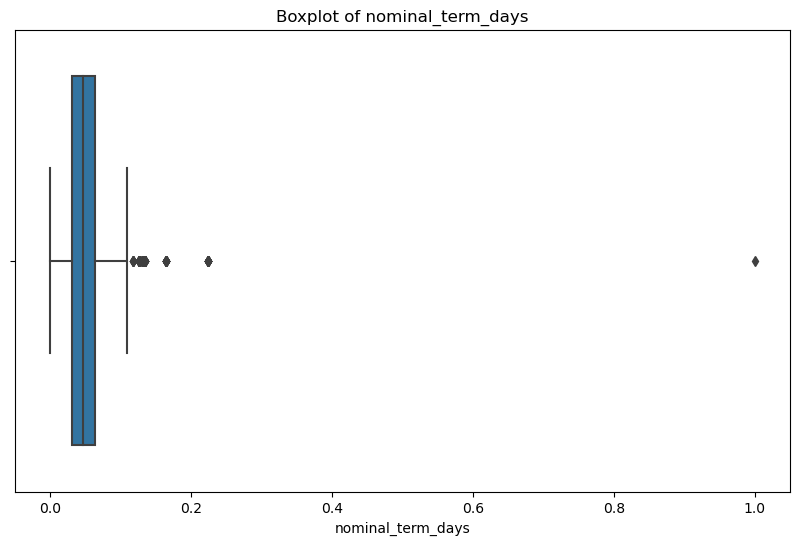

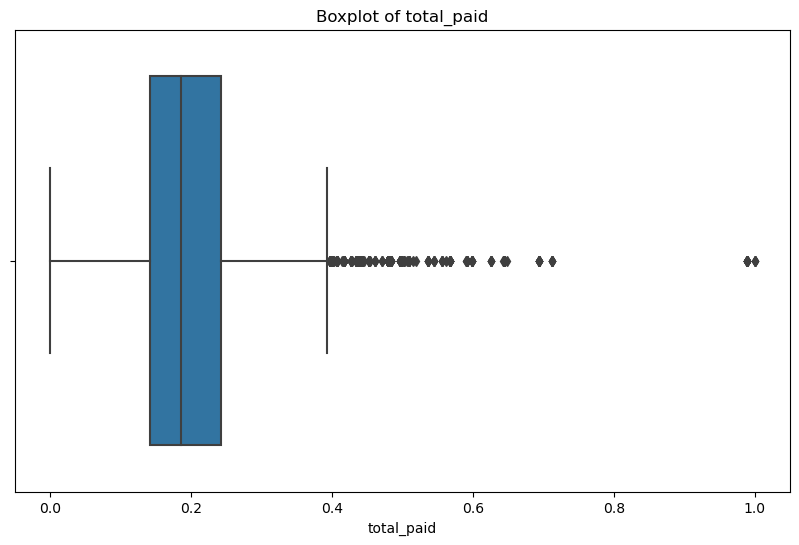

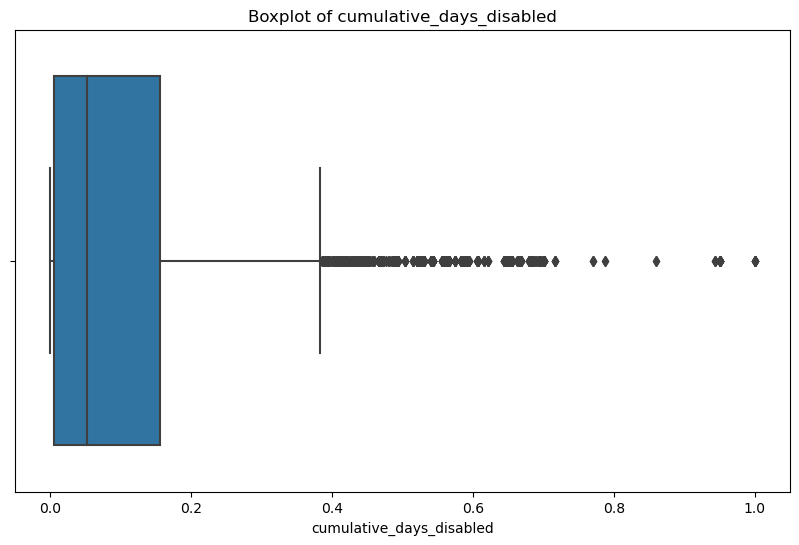

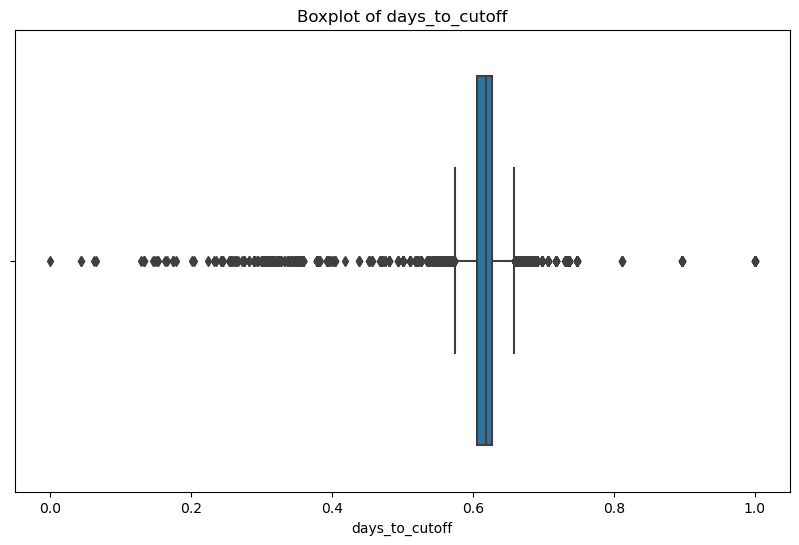

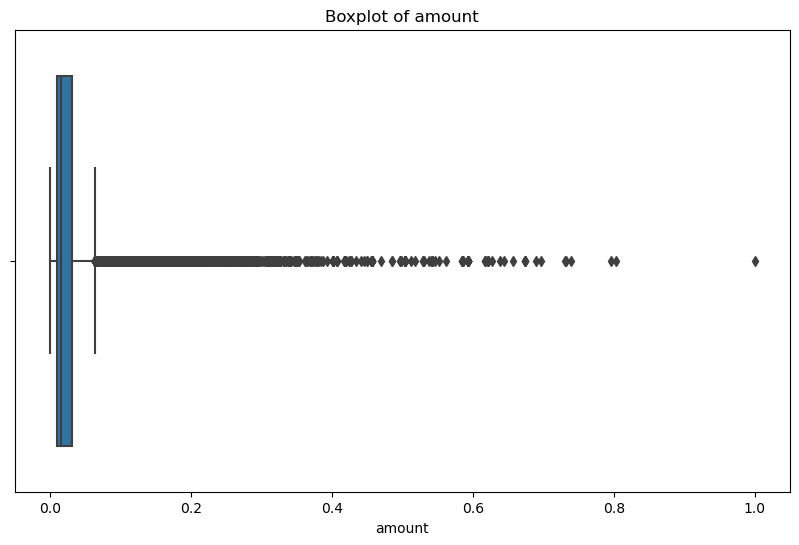

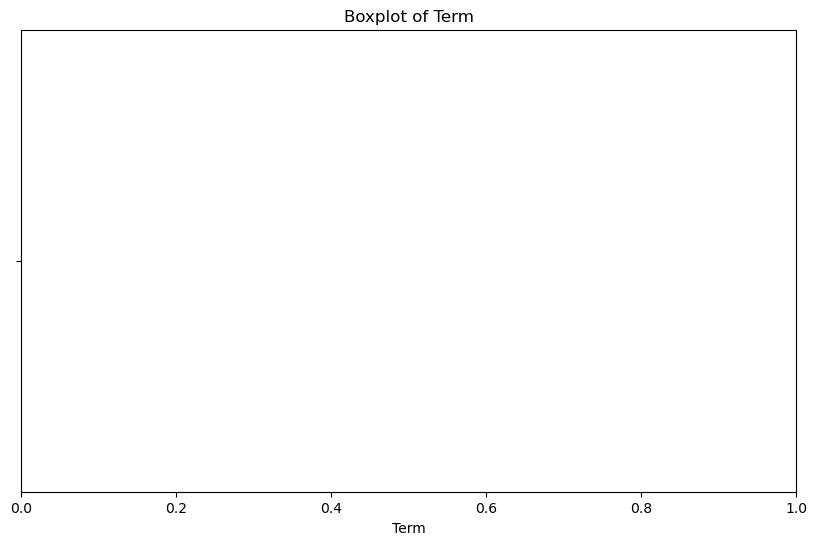

Outlier counts per column:
down_payment: 453 outliers
down_payment_days_included: 0 outliers
minimum_payment: 0 outliers
full_price: 238 outliers
payment_amount_per_period: 0 outliers
payment_period_in_days: 0 outliers
nominal_term_days: 0 outliers
total_paid: 148 outliers
cumulative_days_disabled: 338 outliers
days_to_cutoff: 0 outliers
amount: 0 outliers
Term: 0 outliers


In [12]:
outliers = {}
for column in numerical_columns:
    z_scores = stats.zscore(df3[column])
    abs_z_scores = abs(z_scores)
    outliers[column] = (abs_z_scores > 3).sum()
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df3[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

#outlier counts
print("Outlier counts per column:")
for column, count in outliers.items():
    print(f'{column}: {count} outliers')

In [13]:
#remove outliers
outlier_columns = ['down_payment', 'full_price', 'total_paid', 'cumulative_days_disabled']

#define a threshold for Z-scores to identify outliers
threshold = 3

# Remove outliers in the specified columns
for column in outlier_columns:
    z_scores = stats.zscore(df3[column])
    abs_z_scores = np.abs(z_scores)
    df3 = df3[abs_z_scores <= threshold]

In [14]:
df3.shape

(15011, 37)

# Model 1: Credit risk profiling before customers make a purchase.

### Input variables: customers attributes
 - state	
 - lga	
 - geolocation	
 - gender	
 - age	
 - occupation	
 - business_type	
 - business_size	
 - monthly_generated_income	
 - lead_source	
 - product_use
 
### Output variable: status
- Good customers: Enabled, Unlocked
- At-risk customers: Repossessed, Disabled

### Cleansing

In [15]:
#convert geolocation
df3['latitude'] = df3['geolocation'].apply(lambda x: float(x.split(',')[0]) if pd.notnull(x) else 0)
df3['longitude'] = df3['geolocation'].apply(lambda x: float(x.split(',')[1]) if pd.notnull(x) else 0)
df3 = df3.drop(columns=['geolocation'])

### Feature Enginerring for input variables 

- Encoding.
- create two new variables: 1) convert age from client_date_of_birth and 2) calculate down payment % by down payment/full price.


In [16]:
#convert categorical variables to numeric
label_encoders = {}
for column in df3.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df3[column] = le.fit_transform(df3[column])
    label_encoders[column] = le

In [17]:
#ensure client_date_of_birth is in string format
df3['client_date_of_birth'] = df3['client_date_of_birth'].astype(str)

#drop rows with NaT values
df3 = df3[df3['client_date_of_birth'] != 'NaT']

#create new variable for age by converting client_date_of_birth
def calculate_age(birthdate):
    birthdate = datetime.strptime(birthdate, "%Y-%m-%d")
    today = datetime.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

#apply the function to calculate age
df3['age'] = df3['client_date_of_birth'].apply(calculate_age)

In [18]:
#create new variable for down_payment_percentage
epsilon = 1e-8 #define a small positive constant

#calculate down_payment_percentage with the constant to avoid division by zero
df3['down_payment_percentage'] = df3['down_payment'] / (df3['full_price'] + epsilon)

In [19]:
df3.head()

,account_qid,group_name,product,product_size,group_qid,billing_model,currency,down_payment,down_payment_days_included,minimum_payment,full_price,payment_amount_per_period,payment_period_in_days,nominal_term_days,registration_date,total_paid,status,cumulative_days_disabled,latest_payment_date,days_to_cutoff,payment_due_date,state,lga,gender,client_date_of_birth,occupation,business_type,business_size,monthly_generated_income,lead_source,product_use,payment_qid,amount,effective_date,is_reversed,Term,latitude,longitude,age,down_payment_percentage
2,27,272,11,6,1645,1,0,0.11,0.09,0.04,0.20,0.04,0.43,0.03,2024-03-25,0.08,1,0.00,2024-03-25,0.63,2024-04-24,23,81,1,1982-06-22,13,5,1,5,5,1,14823,0.09,2024-03-25,0,NaN,6.55,3.39,41,0.53
4,26,399,14,7,1668,1,0,0.08,0.09,0.06,0.47,0.06,0.43,0.06,2024-03-25,0.06,1,0.00,2024-03-25,0.63,2024-04-24,9,165,0,1980-09-16,10,6,1,1,4,0,14815,0.07,2024-03-25,0,NaN,6.60,3.34,43,0.18
6,25,587,17,8,1709,0,0,0.36,NaN,NaN,0.20,NaN,NaN,NaN,2024-03-22,0.25,3,0.00,2024-03-22,NaN,NaT,23,6,1,1987-02-17,2,5,1,5,7,0,14773,0.31,2024-03-22,0,NaN,5.00,5.00,37,1.77
8,24,344,14,7,1612,0,0,0.28,NaN,NaN,0.15,NaN,NaN,NaN,2024-03-22,0.20,3,0.00,2024-03-22,NaN,NaT,23,6,1,1987-02-17,13,4,1,5,7,0,14772,0.24,2024-03-22,0,NaN,5.00,5.00,37,1.83
9,23,278,11,6,1692,0,0,0.29,NaN,NaN,0.16,NaN,NaN,NaN,2024-03-22,0.21,3,0.00,2024-03-22,NaN,NaT,23,6,1,1987-02-17,13,5,1,4,7,0,14771,0.26,2024-03-22,0,NaN,5.00,5.00,37,1.81


### Numerical variables

In [20]:
#calculate the threshold for 50% missing values
threshold = len(df3) * 0.5

#remove columns with more than 50% missing values
df3 = df3.loc[:, df3.isnull().sum() <= threshold]
df3.replace("", pd.NA, inplace=True)

#recalculate the threshold and remove columns with more than 50% NaN values
df3 = df3.loc[:, df3.isnull().sum() <= threshold]

#replace remaining missing values with the mean
df3.fillna(df3.mean(), inplace=True)

/var/folders/qn/ft4xq4_d74j4v7njvf9v_vb00000gn/T/ipykernel_22181/4021763998.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df3.fillna(df3.mean(), inplace=True)
/var/folders/qn/ft4xq4_d74j4v7njvf9v_vb00000gn/T/ipykernel_22181/4021763998.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.fillna(df3.mean(), inplace=True)


In [21]:
#check for NaNs or empty values in each column
nan_counts = df3.isnull().sum()

#the count of NaNs in each column
print(nan_counts)

account_qid                      0
group_name                       0
product                          0
product_size                     0
group_qid                        0
billing_model                    0
currency                         0
down_payment                     0
down_payment_days_included       0
minimum_payment                  0
full_price                       0
payment_amount_per_period        0
payment_period_in_days           0
nominal_term_days                0
registration_date                0
total_paid                       0
status                           0
cumulative_days_disabled         0
latest_payment_date              1
days_to_cutoff                   0
payment_due_date              2862
state                            0
lga                              0
gender                           0
client_date_of_birth             0
occupation                       0
business_type                    0
business_size                    0
monthly_generated_in

### Output variables

Label the customers
- 1 is 'Enabled' and 2 is 'Unlocked' <- trusted customers 
- 3 is 'Disabled' and 4 is 'Repossessed' in 'status' <- at-risk customers

In [22]:
#create a new column 'customer'
df3['customer'] = df3['status'].apply(lambda x: 1 if x in [1, 2] else 0)

0   0.52
1   0.48
Name: customer, dtype: float64


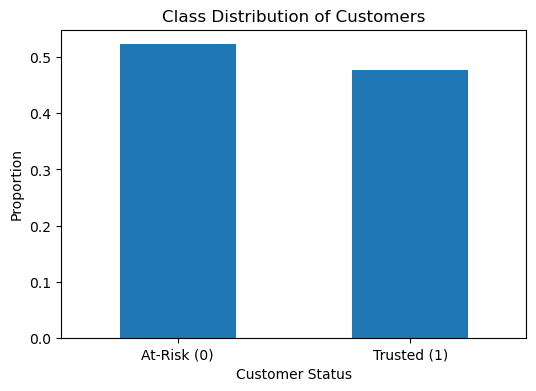

In [23]:
#check class distribution
class_distribution = df3['customer'].value_counts(normalize=True)
print(class_distribution)

plt.figure(figsize=(6,4))
class_distribution.plot(kind='bar')
plt.title('Class Distribution of Customers')
plt.xlabel('Customer Status')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['At-Risk (0)', 'Trusted (1)'], rotation=0)
plt.show()

### Build the XGBoost Model 1

In [24]:
features = df3[['state','lga', 'latitude', 'gender', 'age','occupation','business_type',
'business_size','monthly_generated_income','lead_source','product_use']]
target = df3['customer']

#split
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

#further split for validation
features_train, features_val, target_train, target_val = train_test_split(
    features_train, target_train, test_size=0.25, random_state=42)

In [25]:
#apply SMOTE
smote = SMOTE(random_state=42)
features_train_smote, target_train_smote = smote.fit_resample(features_train, target_train)

#initialize and train the XGBoost classifier
xgb_model = XGBClassifier(max_depth=4, min_child_weight=6, subsample=0.8, colsample_bytree=0.8,
                          objective='binary:logistic', n_estimators=100, learning_rate=0.1)
xgb_model.fit(features_train_smote, target_train_smote)

#validation set prediction and evaluation
val_predictions = xgb_model.predict(features_val)
val_accuracy = accuracy_score(target_val, val_predictions)
val_classification_report = classification_report(target_val, val_predictions)
val_confusion_matrix = confusion_matrix(target_val, val_predictions)

print(f"Validation Accuracy: {val_accuracy:.2f}")
print("Validation Classification Report:\n", val_classification_report)
print("Validation Confusion Matrix:\n", val_confusion_matrix)

#cross-validation
cross_val_scores = cross_val_score(xgb_model, features_train_smote, target_train_smote, cv=5, scoring='accuracy')
print("Cross-validation scores: ", cross_val_scores)
print(f"Mean cross-validation score: {np.mean(cross_val_scores):.2f}")

#test set prediction and evaluation
test_predictions = xgb_model.predict(features_test)
test_accuracy = accuracy_score(target_test, test_predictions)
test_classification_report = classification_report(target_test, test_predictions)
test_confusion_matrix = confusion_matrix(target_test, test_predictions)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Classification Report:\n", test_classification_report)
print("Test Confusion Matrix:\n", test_confusion_matrix)

Validation Accuracy: 0.88
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       754
           1       0.87      0.88      0.88       698

    accuracy                           0.88      1452
   macro avg       0.88      0.88      0.88      1452
weighted avg       0.88      0.88      0.88      1452

Validation Confusion Matrix:
 [[660  94]
 [ 82 616]]
Cross-validation scores:  [0.89308855 0.88552916 0.89740821 0.89308855 0.8887689 ]
Mean cross-validation score: 0.89
Test Accuracy: 0.88
Test Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88       726
           1       0.85      0.92      0.88       726

    accuracy                           0.88      1452
   macro avg       0.88      0.88      0.88      1452
weighted avg       0.88      0.88      0.88      1452

Test Confusion Matrix:
 [[613 113]
 [ 61 665]]


In [26]:
#features_train

### Feature Importance

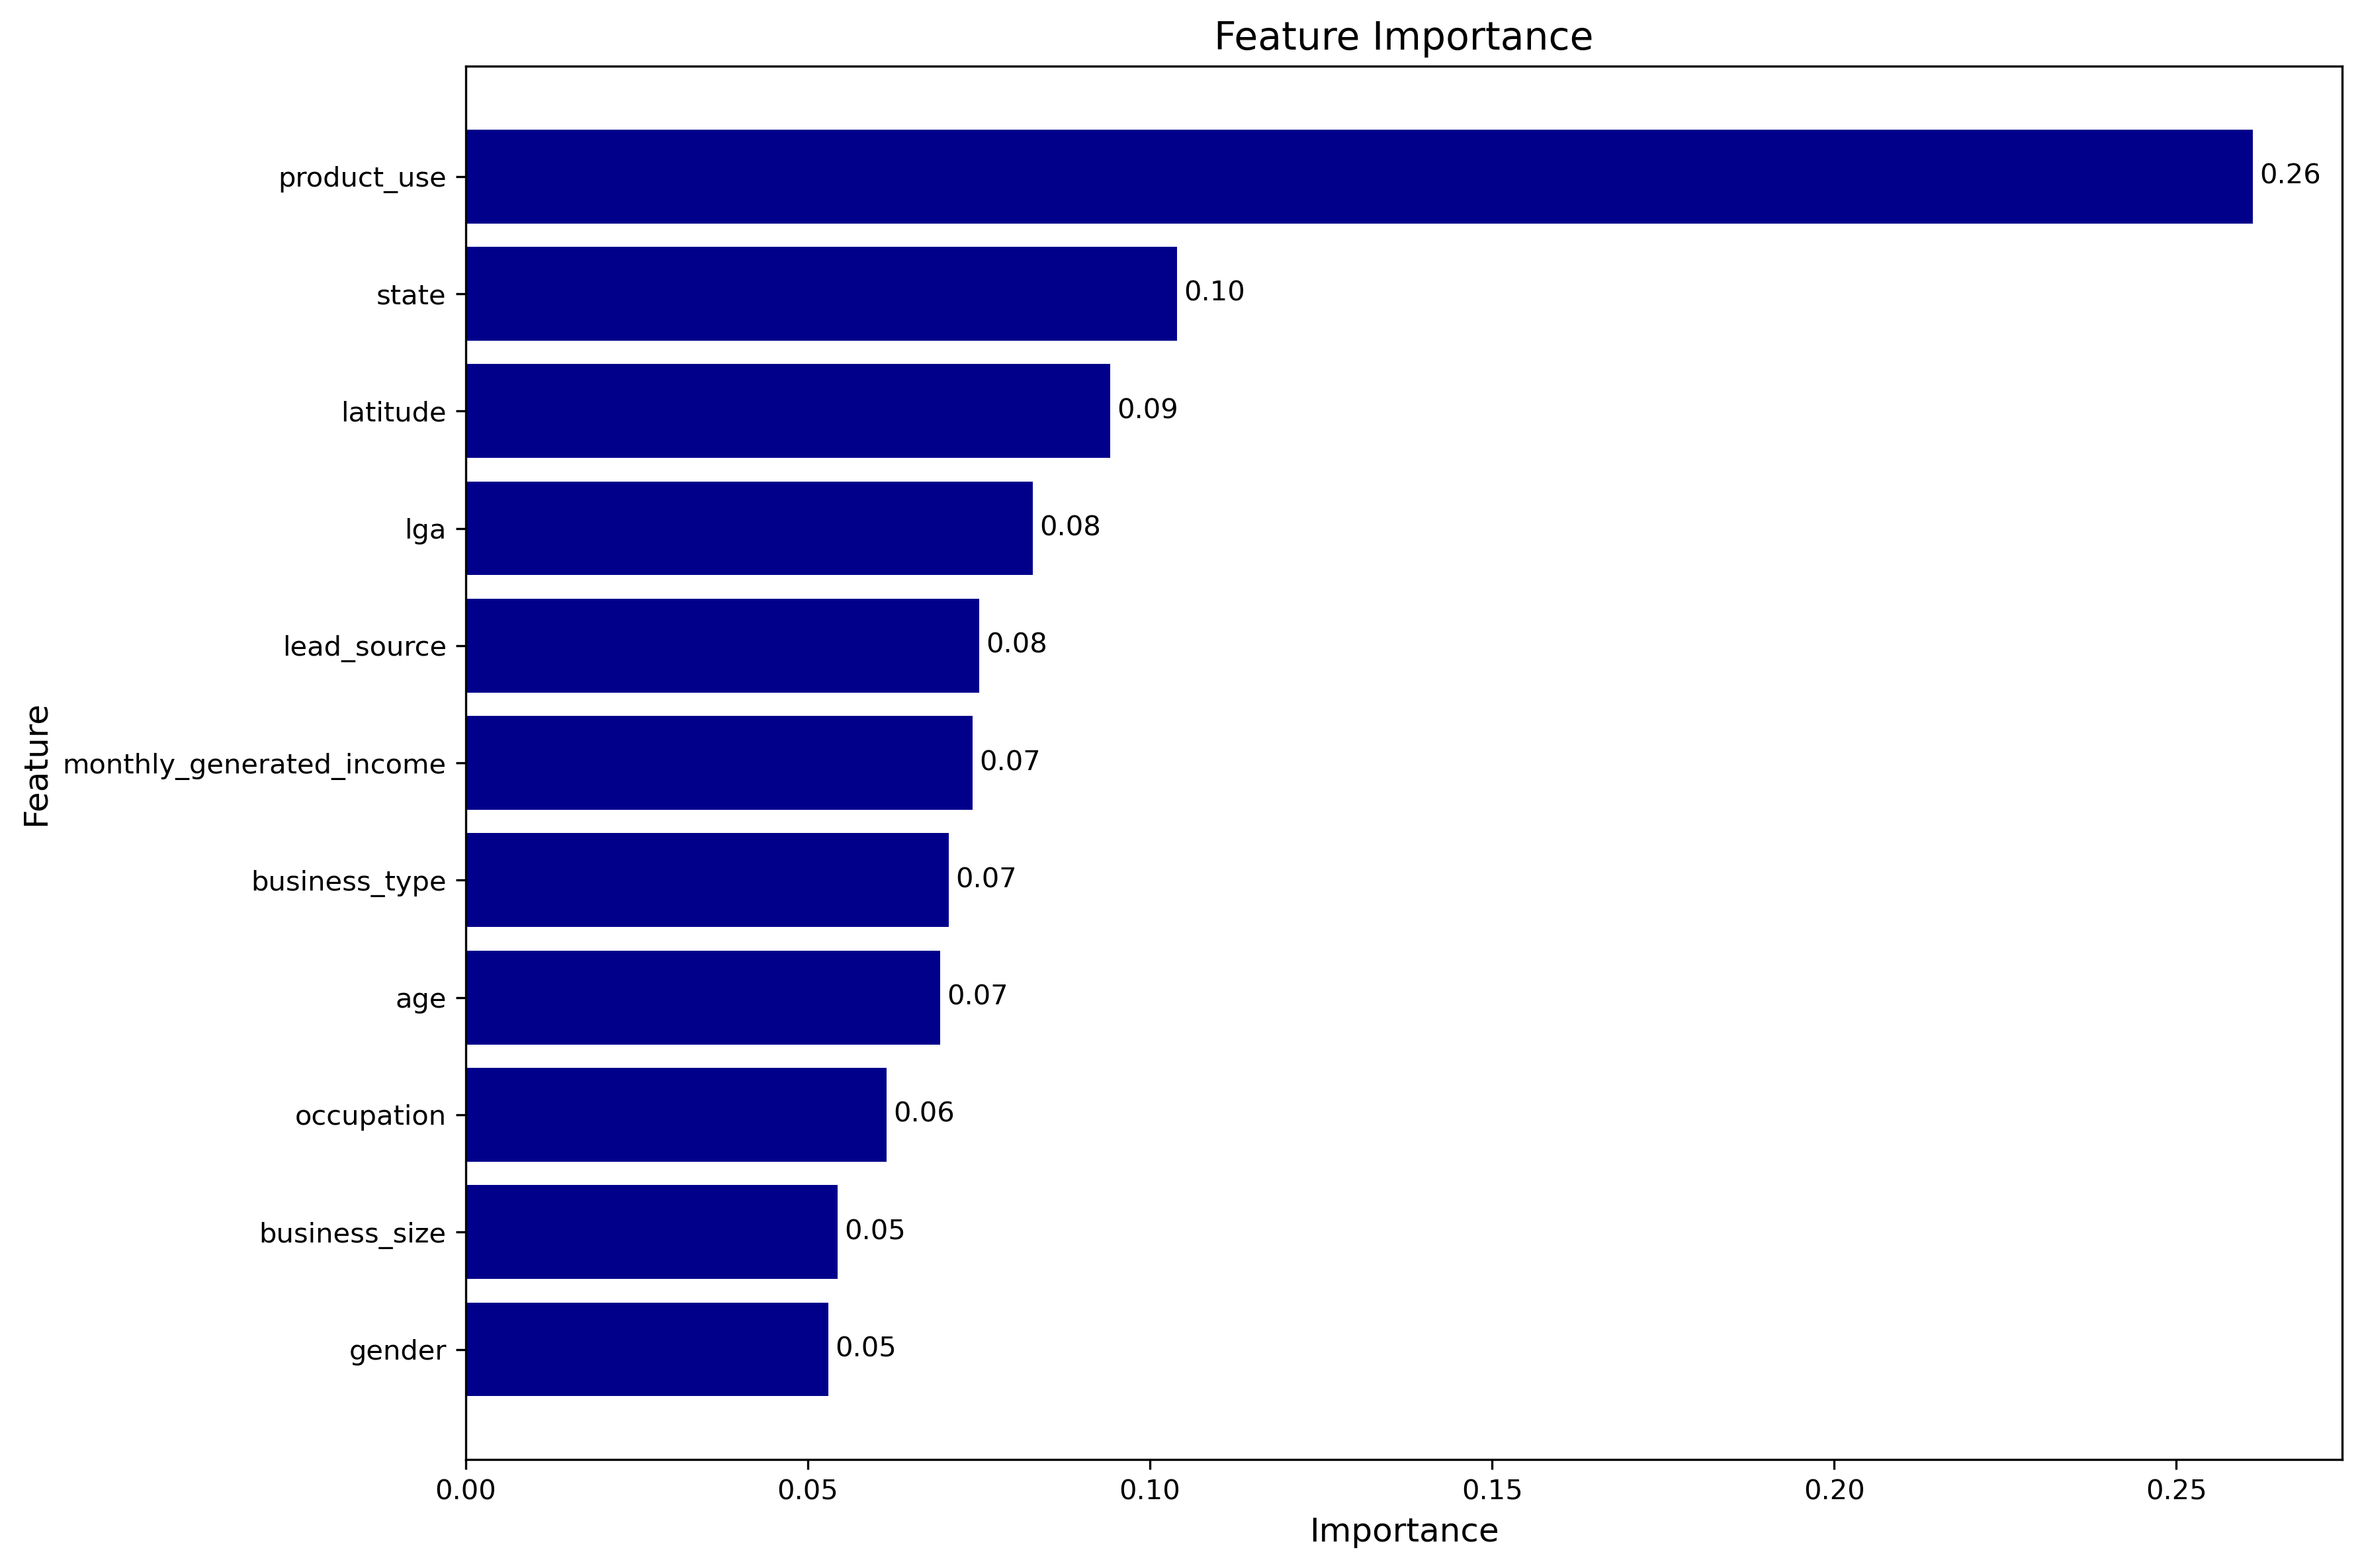

                     Feature  Importance
10               product_use        0.26
0                      state        0.10
2                   latitude        0.09
1                        lga        0.08
9                lead_source        0.08
8   monthly_generated_income        0.07
6              business_type        0.07
4                        age        0.07
5                 occupation        0.06
7              business_size        0.05
3                     gender        0.05


In [27]:
feature_importance = xgb_model.feature_importances_
features_list = features.columns

df_fi = pd.DataFrame({'Feature': features_list, 'Importance': feature_importance})
df_fi = df_fi.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8) , dpi=300)
bars = plt.barh(df_fi['Feature'], df_fi['Importance'], color='darkblue')
plt.xlabel('Importance', fontsize=12) 
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance', fontsize=14) 
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + 0.001,  
             bar.get_y() + bar.get_height()/2,  
             '{:.2f}'.format(bar.get_width()),  
             va='center') 

plt.tight_layout()  
plt.show()
print(df_fi)

# Model 2: Credit risk profiling to predict the likelihood of repossession, which occurs when a customer fails to make payments/installments.

### Input variables, adding payment history

1. customers attributes
 - state	
 - lga	
 - geolocation	
 - gender	
 - age	
 - occupation	
 - business_type	
 - business_size	
 - monthly_generated_income	
 - lead_source	
 - product_use
 
2. Payment History and products
- down_payment_percentage
- total_paid
- minimum_payment
- cumulative_days_disabled
- billing_model
- product	
- product_size
- amount

### Output variable: status
- Enabled, Repossessed, Disabled
- Unlocked (i.e. full upfront payment) would not be considered in this model.

In [28]:
#create a new column 'customer2' and exclude "unlocked"
df3_filtered = df3[df3['status'] != 2]
df3_filtered['customer2'] = df3_filtered['status'].apply(lambda x: 1 if x in [3, 4] else 0)

#1 is 'Enabled' and 2 is 'Unlocked' <- trusted customers 
#3 is 'Disabled' and 4 is 'Repossessed' in 'status' <- at-risk customers

/var/folders/qn/ft4xq4_d74j4v7njvf9v_vb00000gn/T/ipykernel_22181/1576272640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_filtered['customer2'] = df3_filtered['status'].apply(lambda x: 1 if x in [3, 4] else 0)


### Build the XGBoost Model 2

In [29]:
features2 = df3_filtered[['state', 'lga', 'latitude', 'gender', 'age', 'occupation', 'business_type', 'business_size',
                'monthly_generated_income', 'lead_source', 'product_use', 'down_payment_percentage', 'total_paid', 
                'minimum_payment', 'cumulative_days_disabled', 'billing_model', 
                'product', 'product_size', 'amount']]
    
target2 = df3_filtered['customer2']

In [30]:
#split
features_train2, features_test2, target_train2, target_test2 = train_test_split(
    features2, target2, test_size=0.2, random_state=42)

features_train2, features_val2, target_train2, target_val2 = train_test_split(
    features_train2, target_train2, test_size=0.25, random_state=42)

#initialize and apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
features_train_resampled, target_train_resampled = ros.fit_resample(features_train2, target_train2)

#feature scaling
scaler = StandardScaler()
features_train_resampled = scaler.fit_transform(features_train_resampled)
features_val2 = scaler.transform(features_val2)
features_test2 = scaler.transform(features_test2)

#initialize the XGBoost classifier with tuned parameters
xgb_model2 = XGBClassifier(max_depth=3, min_child_weight=1, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
                           n_estimators=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')

#train the model
xgb_model2.fit(features_train_resampled, target_train_resampled)

#evaluate on validation set
val_predictions2 = xgb_model2.predict(features_val2)
val_accuracy2 = accuracy_score(target_val2, val_predictions2)
val_classification_report2 = classification_report(target_val2, val_predictions2)
val_confusion_matrix2 = confusion_matrix(target_val2, val_predictions2)
val_roc_auc2 = roc_auc_score(target_val2, xgb_model2.predict_proba(features_val2)[:, 1])

print("Validation Accuracy: ", val_accuracy2)
print("Validation Classification Report:\n", val_classification_report2)
print("Validation Confusion Matrix:\n", val_confusion_matrix2)
print("Validation ROC AUC Score: ", val_roc_auc2)

#cross-validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores2 = cross_val_score(xgb_model2, features_train_resampled, target_train_resampled, cv=stratified_cv, scoring='accuracy')
print("Cross-validation scores: ", cross_val_scores2)
print("Mean cross-validation score: ", cross_val_scores2.mean())

#evaluate on test set
test_predictions2 = xgb_model2.predict(features_test2)
test_accuracy2 = accuracy_score(target_test2, test_predictions2)
test_classification_report2 = classification_report(target_test2, test_predictions2)
test_confusion_matrix2 = confusion_matrix(target_test2, test_predictions2)
test_roc_auc2 = roc_auc_score(target_test2, xgb_model2.predict_proba(features_test2)[:, 1])

print(f"Test Accuracy: {test_accuracy2:.2f}")
print("Test Classification Report:\n", test_classification_report2)
print("Test Confusion Matrix:\n", test_confusion_matrix2)
print("Test ROC AUC Score: ", test_roc_auc2)

Validation Accuracy:  0.8656403079076277
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       852
           1       0.81      0.87      0.84       577

    accuracy                           0.87      1429
   macro avg       0.86      0.87      0.86      1429
weighted avg       0.87      0.87      0.87      1429

Validation Confusion Matrix:
 [[733 119]
 [ 73 504]]
Validation ROC AUC Score:  0.9425411510077216
Cross-validation scores:  [0.88791423 0.89766082 0.8791423  0.88097561 0.88292683]
Mean cross-validation score:  0.8857239575904531
Test Accuracy: 0.87
Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       864
           1       0.81      0.89      0.85       565

    accuracy                           0.87      1429
   macro avg       0.87      0.88      0.87      1429
weighted avg       0.88      0.87      0.88  

/Users/kerin/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kerin/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kerin/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kerin/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kerin/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kerin/an

### Feature Importance

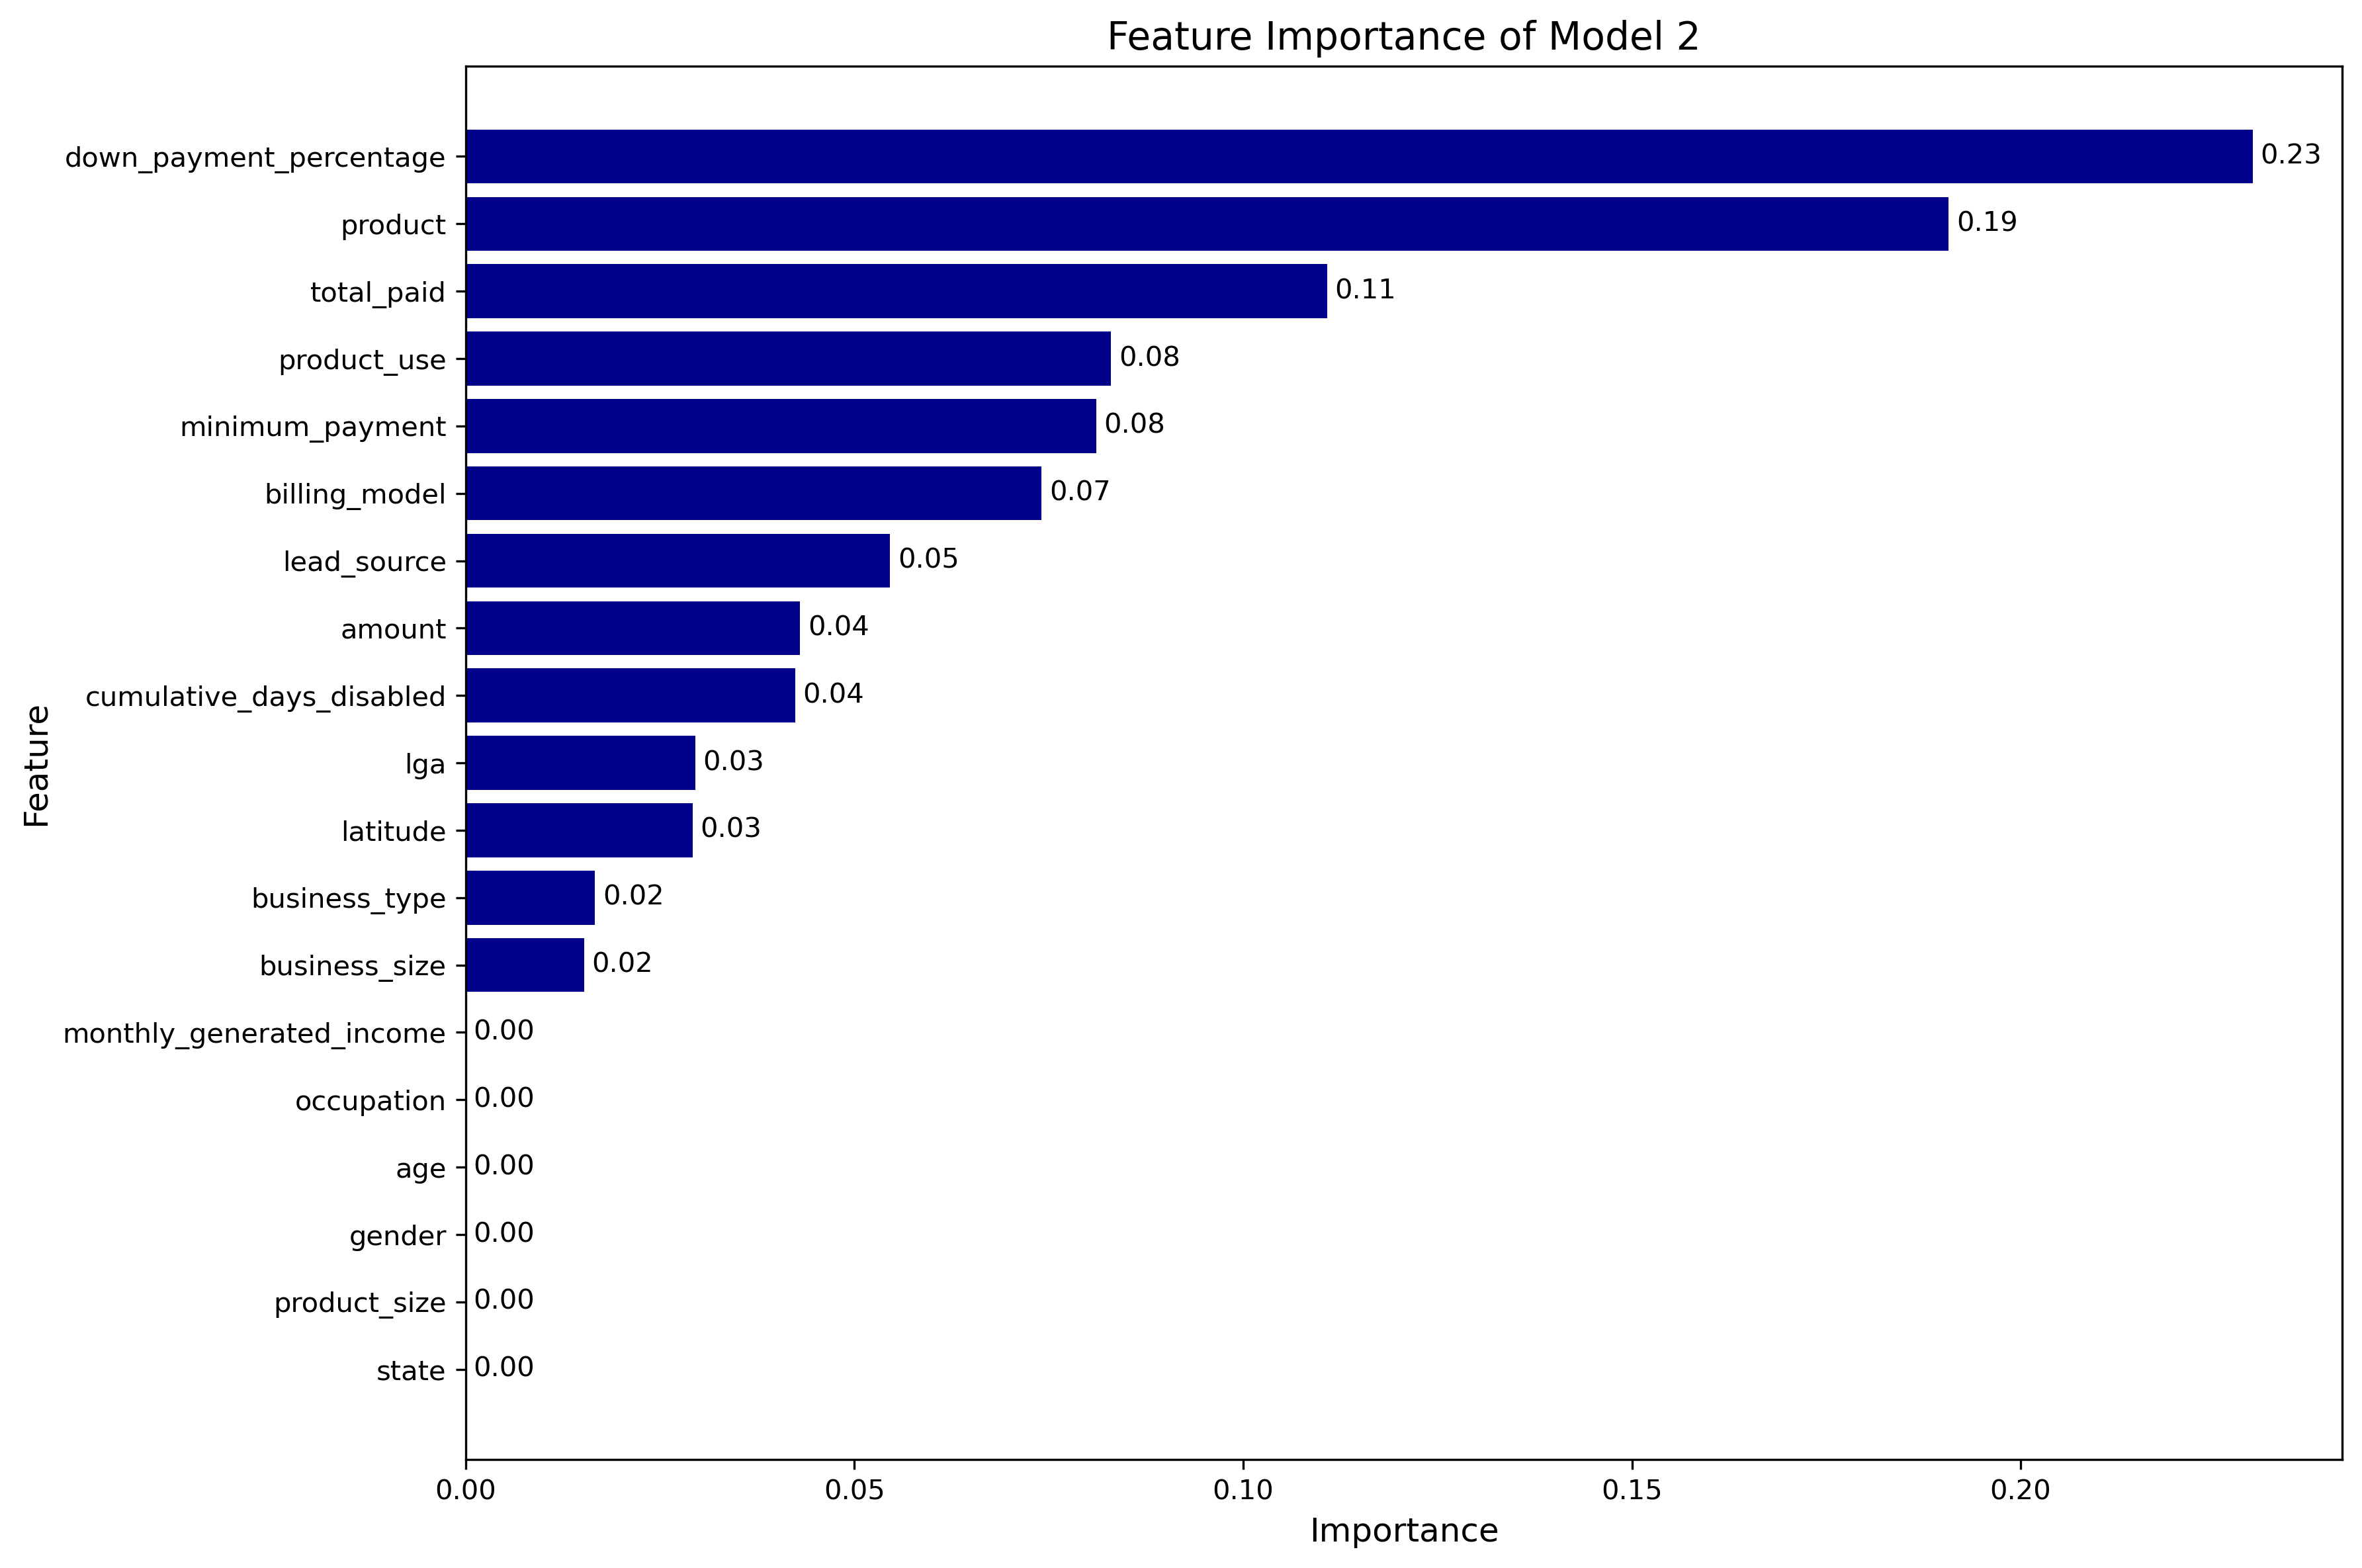

                     Feature  Importance
11   down_payment_percentage        0.23
16                   product        0.19
12                total_paid        0.11
10               product_use        0.08
13           minimum_payment        0.08
15             billing_model        0.07
9                lead_source        0.05
18                    amount        0.04
14  cumulative_days_disabled        0.04
1                        lga        0.03
2                   latitude        0.03
6              business_type        0.02
7              business_size        0.02
8   monthly_generated_income        0.00
5                 occupation        0.00
4                        age        0.00
3                     gender        0.00
17              product_size        0.00
0                      state        0.00


In [31]:
feature_importance2 = xgb_model2.feature_importances_
features_list2 = features2.columns 

df_fi2 = pd.DataFrame({'Feature': features_list2, 'Importance': feature_importance2})
df_fi2 = df_fi2.sort_values(by='Importance', ascending=False)  # Correct sort operation variable


plt.figure(figsize=(12, 8), dpi=300)  
bars = plt.barh(df_fi2['Feature'], df_fi2['Importance'], color='darkblue') 
plt.xlabel('Importance', fontsize=12)  
plt.ylabel('Feature', fontsize=12)  
plt.title('Feature Importance of Model 2', fontsize=14)  
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
plt.gca().invert_yaxis()  


for bar in bars:
    plt.text(bar.get_width() + 0.001,  
             bar.get_y() + bar.get_height()/2,  
             '{:.2f}'.format(bar.get_width()), 
             va='center')  

plt.tight_layout() 
plt.show()
print(df_fi2)

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [31]:
def currency_formatter(x, pos):
    return '{:,.0f}'.format(x)
formatter = FuncFormatter(currency_formatter)

In [2]:
pricing=pd.read_csv('pricing.csv')
clients=pd.read_csv('client accounts.csv')

In [3]:
grouped_by_billing_model = pricing.groupby('billing_model').agg({
    'down_payment': 'mean',
    'payment_amount_per_period': 'mean'})
grouped_by_billing_model

,down_payment,payment_amount_per_period
billing_model,,
Direct_Sale,680697.130373,NaN
PAYG,193274.070317,85086.911235


In [4]:
grouped_by_product_size=pricing.groupby('product_size').size()
grouped_by_product_size

product_size
108L     323
1160L      2
119L       2
1280L     17
158L     351
180L       6
195L      27
208L     638
538L     586
540L       2
700L       1
dtype: int64

In [5]:
price_comparison = pricing.groupby('product')['full_price'].mean()
pd.set_option('display.float_format', '{:.2f}'.format)
price_comparison

product
108L Freezer - Legacy                       512922.20
108L Freezer - Outright (2021-2022 Aug)     294974.96
108L Freezer Non-PAYGO                      179290.67
108L Non-PAYGO                              284780.46
119L Non-PAYGO                              875891.50
1280L Freezer - Legacy                     1050824.00
1280L Freezer - Outright (2021-2022 Aug)    835756.40
1280L Non-PAYGO                            1987016.80
158L Freezer - Legacy                       604790.47
158L Freezer - Outright (2021-2022 Aug)     548245.82
158L Non-PAYGO                             1032098.50
195L Icemaker Non-Paygo                    1375256.79
208L Freezer - Legacy                       659375.42
208L Freezer - Outright (2021-2022 Aug)     550273.70
208L Non-PAYGO                             1029045.68
538L Freezer - Legacy                      1109680.48
538L Freezer - Outright (2021-2022 Aug)     910871.32
538L Non-PAYGO                             1485567.30
540L Freezer - Legac

In [6]:
pd.reset_option('display.float_format')

In [7]:
merged_data = pd.merge(pricing, clients, on='group_qid')

In [8]:
payment_behavior_by_group = merged_data.groupby('group_name_x')['payment_amount_per_period_x'].mean()
payment_behavior_by_group

group_name_x
108L Freezer - 10 Months (Legacy)                                 15901.0
108L Freezer - 11 Months (Ayedegbe Solomon Obelekan)              13132.0
108L Freezer - 11 Months (Genesis Farm And Poultry Equipment)     13132.0
108L Freezer - 11 Months (Joseph Omogbayi)                        13132.0
108L Freezer - 11 Months (Legacy)                                 35850.0
                                                                   ...   
538L Stand Alone - 6 Months                                       98328.0
538L ibitoye bose Sikira                                          53552.0
540L Legacy Freezer - 22 Months                                  148587.0
540L Legacy Freezer - 8 Months                                    57177.0
700L Legacy Freezer - 4 Months                                   144269.0
Name: payment_amount_per_period_x, Length: 795, dtype: float64

In [9]:
from IPython.display import display
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
payment_behavior_by_group

group_name_x
108L Freezer - 10 Months (Legacy)                                                                                                             15901.00
108L Freezer - 11 Months (Ayedegbe Solomon Obelekan)                                                                                          13132.00
108L Freezer - 11 Months (Genesis Farm And Poultry Equipment)                                                                                 13132.00
108L Freezer - 11 Months (Joseph Omogbayi)                                                                                                    13132.00
108L Freezer - 11 Months (Legacy)                                                                                                             35850.00
108L Freezer - 11 Months (Oyekunle Awawu Temitope)                                                                                            13132.00
108L Freezer - 11 Months (Oyekunle Basirat)                                      

In [ ]:
full_price_by_group = merged_data.groupby('group_name_x')['full_price_x'].mean()
full_price_by_group.sort_values(ascending=False)

In [11]:
payment_behavior_by_product = merged_data.groupby('product_x')['payment_amount_per_period_x'].mean()
payment_behavior_by_product

product_x
108L Freezer - Legacy                       39547.18
108L Freezer - Outright (2021-2022 Aug)          NaN
108L Freezer Non-PAYGO                      19883.63
108L Non-PAYGO                              31055.76
119L Non-PAYGO                              33217.00
1280L Freezer - Legacy                      83541.00
1280L Freezer - Outright (2021-2022 Aug)         NaN
1280L Non-PAYGO                            240108.00
158L Freezer - Legacy                       46835.15
158L Freezer - Outright (2021-2022 Aug)          NaN
158L Non-PAYGO                             102077.51
195L Icemaker Non-Paygo                     77776.48
208L Freezer - Legacy                       53582.82
208L Freezer - Outright (2021-2022 Aug)          NaN
208L Non-PAYGO                             146966.70
538L Freezer - Legacy                       88667.98
538L Freezer - Outright (2021-2022 Aug)    560668.16
538L Non-PAYGO                             123454.26
540L Freezer - Legacy Custom        

In [16]:
payment_behavior_by_product_state = merged_data.groupby('state')['payment_amount_per_period_x'].mean()
payment_behavior_by_product_state

state
Abia                         20066.00
Adamawa                      74850.00
Akwa Ibom                    45626.50
Anambra                      45587.17
Bayelsa                      78682.50
Benue                             NaN
Cross River                  68390.40
Delta                        88719.95
Ebonyi                            NaN
Edo                          68217.83
Ekiti                        69734.64
Enugu                        84115.17
Federal Capital Territory    77874.27
Imo                          91786.04
Kaduna                       57568.00
Kano                         31913.50
Kebbi                        41110.00
Kogi                         59805.45
Kwara                        82243.17
Lagos                        75480.59
Nasarawa                    117953.50
Niger                        82000.00
Not indicated                78414.01
Ogun                         83957.67
Ondo                         84688.37
Osun                         87387.39
Oyo   

In [17]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')
pd.reset_option('display.width')
#pd.reset_option('display.float_format')

In [18]:
repossessed_data = merged_data[merged_data['status'] == 'Repossessed']
repossessed_count = repossessed_data.groupby('product_size_x').size().reset_index(name='count')

In [19]:
repossessed_count

,product_size_x,count
0,108L,33
1,1280L,2
2,158L,17
3,195L,4
4,208L,29
5,538L,37


In [20]:
total_sold = merged_data.groupby('product_size_x').size().reset_index(name='count')
total_sold

,product_size_x,count
0,108L,473
1,1160L,2
2,119L,2
3,1280L,18
4,158L,594
5,180L,6
6,195L,50
7,208L,945
8,538L,810
9,540L,2


payments per month max, min, mean

In [21]:
max_price = merged_data.groupby('product_size_x')['payment_amount_per_period_x'].max()
max_price.sort_values(ascending=False)

product_size_x
538L    1447930.00
208L     923500.00
158L     516190.00
1280L    286607.00
195L     241500.00
108L     196690.00
540L     148587.00
700L     144269.00
1160L    105298.00
180L     102000.00
119L      33217.00
Name: payment_amount_per_period_x, dtype: float64

In [22]:
min_price = merged_data.groupby('product_size_x')['payment_amount_per_period_x'].min()
min_price.sort_values(ascending=False)

product_size_x
700L    144269.00
1160L    83853.00
1280L    80828.00
540L     57177.00
119L     33217.00
180L     31875.00
208L     12000.00
158L     11623.00
195L     10190.00
108L      8959.00
538L      3000.00
Name: payment_amount_per_period_x, dtype: float64

In [23]:
mean_price = merged_data.groupby('product_size_x')['payment_amount_per_period_x'].mean()
mean_price.sort_values(ascending=False)

product_size_x
1280L   154231.00
700L    144269.00
538L    112315.50
540L    102882.00
1160L    94575.50
195L     80406.20
180L     77519.75
208L     76023.94
158L     63586.20
119L     33217.00
108L     31162.83
Name: payment_amount_per_period_x, dtype: float64

full price max, min mean

In [24]:
max_price = merged_data.groupby('product_size_x')['full_price_x'].max()
max_price.sort_values(ascending=False)

product_size_x
538L    4490445.00
540L    3858501.00
1160L   2820878.00
1280L   2804836.00
195L    2727950.00
180L    2582000.00
208L    2412092.00
158L    2361150.00
108L    1498534.00
119L    1137094.00
700L     871609.00
Name: full_price_x, dtype: float64

In [25]:
max_price = merged_data.groupby('product_size_x')['full_price_x'].mean()
max_price.sort_values(ascending=False)

product_size_x
540L    2411547.00
1160L   1904704.00
180L    1538030.83
1280L   1495495.94
195L    1351399.16
538L    1270985.90
119L     875891.50
700L     871609.00
208L     844456.45
158L     773926.07
108L     317737.64
Name: full_price_x, dtype: float64

In [26]:
min_price = merged_data.groupby('product_size_x')['full_price_x'].min()
min_price.sort_values(ascending=False)

product_size_x
1160L   988530.00
540L    964593.00
700L    871609.00
1280L   700000.00
119L    614689.00
195L    536000.00
538L    423240.00
180L    410340.00
208L    183000.00
158L    128000.00
108L     95000.00
Name: full_price_x, dtype: float64

In [27]:
pd.set_option('display.float_format', '{:.2f}'.format)
rev_by_product_size = merged_data.groupby('product_size_x')['full_price_x'].sum()
rev_by_product_size.sort_values(ascending=False)

product_size_x
538L    1029498579.14
208L     798011346.24
158L     459712083.20
108L     150289901.80
195L      67569958.00
1280L     26918927.00
180L       9228185.00
540L       4823094.00
1160L      3809408.00
119L       1751783.00
700L        871609.00
Name: full_price_x, dtype: float64

In [28]:
grouped_data = merged_data.groupby('product_size_x').agg(total_price=('full_price_x', 'sum'),count=('full_price_x', 'count'))
grouped_data['ASP'] = grouped_data['total_price'] / grouped_data['count']

In [29]:
sorted_grouped_data = grouped_data.sort_values(by='ASP', ascending=False)
sorted_grouped_data

,total_price,count,ASP
product_size_x,,,
540L,4823094.00,2,2411547.00
1160L,3809408.00,2,1904704.00
180L,9228185.00,6,1538030.83
1280L,26918927.00,18,1495495.94
195L,67569958.00,50,1351399.16
538L,1029498579.14,810,1270985.90
119L,1751783.00,2,875891.50
700L,871609.00,1,871609.00
208L,798011346.24,945,844456.45


<ipython-input-32-538f4817cafe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_grouped_data.index, y=sorted_grouped_data['ASP'], palette="muted")


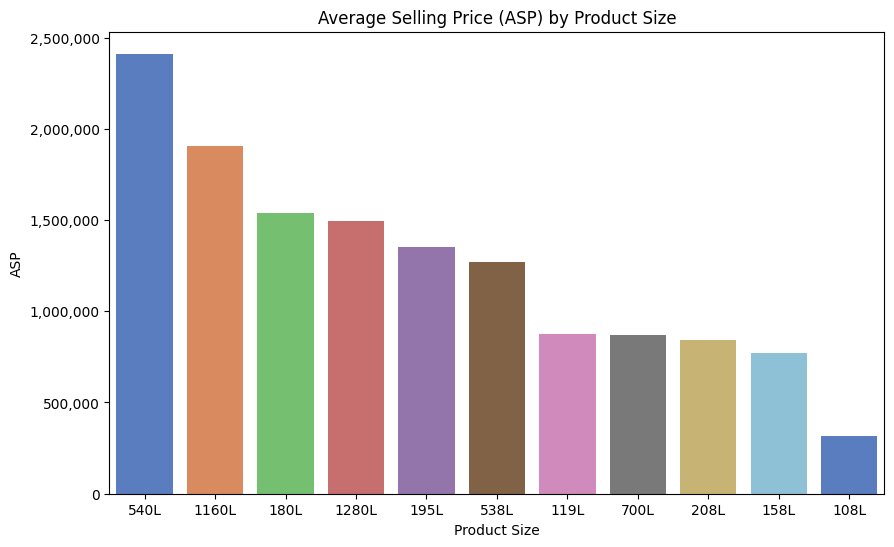

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_grouped_data.index, y=sorted_grouped_data['ASP'], palette="muted")
plt.title('Average Selling Price (ASP) by Product Size')
plt.xlabel('Product Size')
plt.ylabel('ASP')
plt.gca().yaxis.set_major_formatter(formatter)

In [33]:
sorted_grouped_data = grouped_data.sort_values(by='total_price', ascending=False)

<ipython-input-34-6ffbf9eaf6a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_grouped_data.index, y=sorted_grouped_data['total_price'],palette="muted")


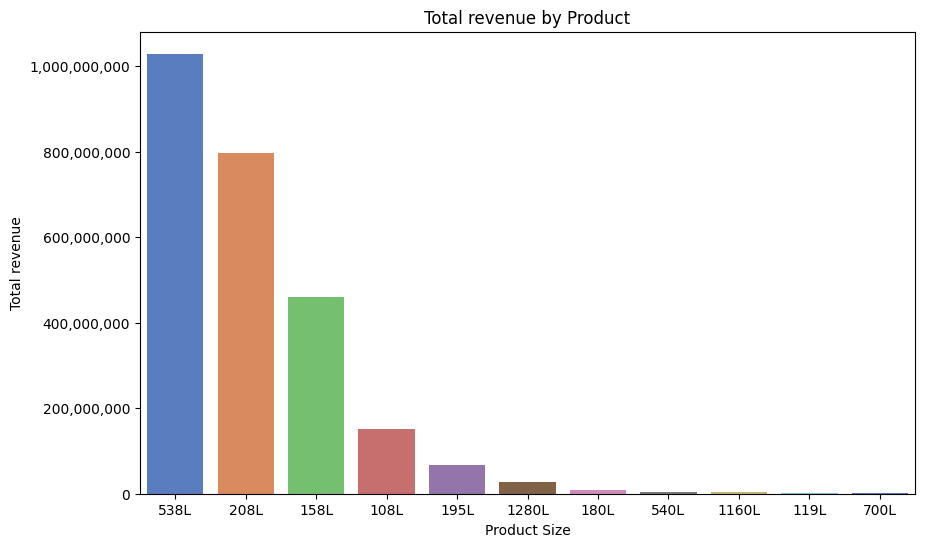

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_grouped_data.index, y=sorted_grouped_data['total_price'],palette="muted")
plt.title('Total revenue by Product')
plt.xlabel('Product Size')
plt.ylabel('Total revenue')
plt.gca().yaxis.set_major_formatter(formatter)

In [35]:
sorted_grouped_data = grouped_data.sort_values(by='count', ascending=False)

<ipython-input-36-db2b34d10f49>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_grouped_data.index, y=sorted_grouped_data['count'], palette='tab10')


Text(0, 0.5, 'Count')

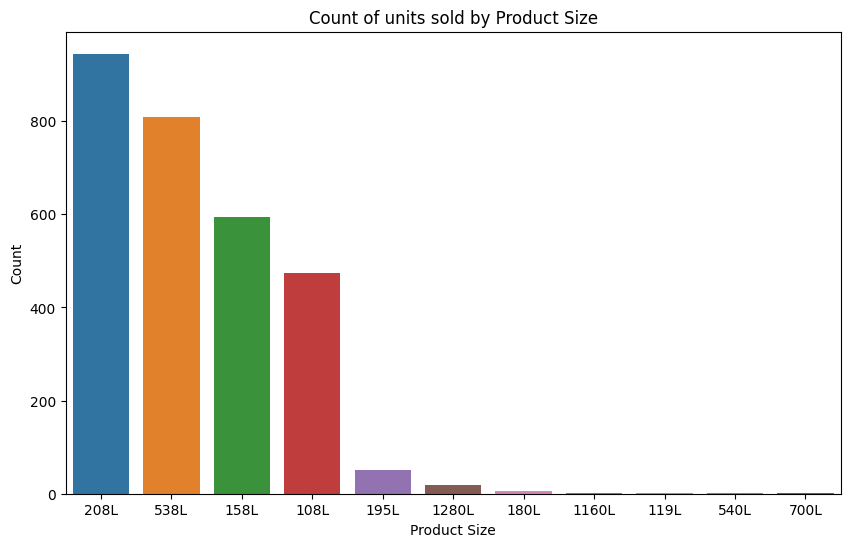

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_grouped_data.index, y=sorted_grouped_data['count'], palette='tab10')
plt.title('Count of units sold by Product Size')
plt.xlabel('Product Size')
plt.ylabel('Count')

In [37]:
#10 income ranges
#/1,000,001 and Above/ /500,001 – 1,000,000/ /400,001 – 500,000/ /300,001 – 400,000/ /250,001 – 300,000/ /200,001 – 250,000/ /150,001 – 200,000/ /100,001 – 150,000/ /50,001 – 100,000/ /50,000 and Below/
def income_to_categories(income_range):
    if '1,000,001 and Above' in income_range:
        return 1
    if '500,001 – 1,000,000' in income_range:
        return 2
    if '400,001 – 500,000' in income_range:
        return 3
    if '300,001 – 400,000' in income_range:
        return 4
    if '250,001 – 300,000' in income_range:
        return 5
    if '200,001 – 250,000' in income_range:
        return 6
    if '150,001 – 200,000' in income_range:
        return 7
    if '100,001 – 150,000' in income_range:
        return 8
    if '50,001 – 100,000' in income_range:
        return 9
    if '50,000 and Below' in income_range:
        return 10
    else :
        return "NA"

In [38]:
merged_data['monthly_generated_income'] = merged_data['monthly_generated_income'].astype(str)

In [39]:
merged_data['income_cat'] = merged_data['monthly_generated_income'].apply(income_to_categories)

In [40]:
avg_full_price_by_business_type = merged_data.groupby('business_type')['full_price_x'].mean()
avg_full_price_by_business_type

business_type
Beverages Dealer     1026125.92
Civil Servant         854073.52
Corperate Worker      536000.00
Corporate Worker      637427.97
Frozen Food Seller    967200.52
Ice Block Seller      888427.48
Others                817595.77
Restaurants/Bar       827995.57
Name: full_price_x, dtype: float64

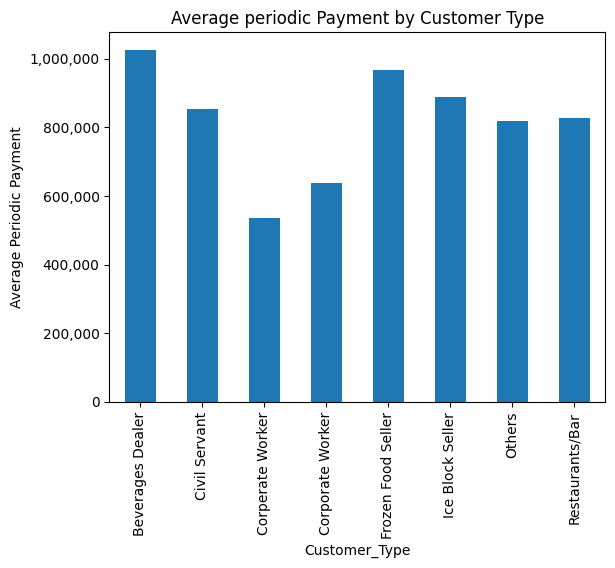

In [73]:
avg_full_price_by_business_type.plot(kind='bar')
plt.title('Average periodic Payment by Customer Type')
plt.xlabel('Customer_Type')
plt.ylabel('Average Periodic Payment')
plt.gca().yaxis.set_major_formatter(formatter)

In [41]:
most_common_product_size_by_business_type = merged_data.groupby('business_type')['product_size_x'].agg(lambda x: x.value_counts().idxmax())
most_common_product_size_by_business_type

business_type
Beverages Dealer      208L
Civil Servant         158L
Corperate Worker      195L
Corporate Worker      108L
Frozen Food Seller    538L
Ice Block Seller      538L
Others                158L
Restaurants/Bar       208L
Name: product_size_x, dtype: object

In [42]:
avg_product_size_by_income_and_business = merged_data.groupby(['income_cat', 'business_type']).agg({'product_size_x': lambda x: x.value_counts().index[0]})
avg_product_size_by_income_and_business

product_size_x
income_cat business_type                    
1          Beverages Dealer             538L
           Frozen Food Seller           108L
           Others                       158L
           Restaurants/Bar              208L
2          Beverages Dealer             208L
...                                      ...
NA         Corporate Worker             108L
           Frozen Food Seller           208L
           Ice Block Seller             208L
           Others                       108L
           Restaurants/Bar              538L

[71 rows x 1 columns]

understand who is buying what products

In [74]:
avg_fullprice_by_income = merged_data.groupby('income_cat')['full_price_x'].mean()
avg_fullprice_by_income

income_cat
1    1075591.67
2    1125595.92
3    1016227.61
4     932882.31
5     983072.23
6     855038.19
7     827281.73
8     854340.81
9     739420.99
10   2604096.67
NA    802467.20
Name: full_price_x, dtype: float64

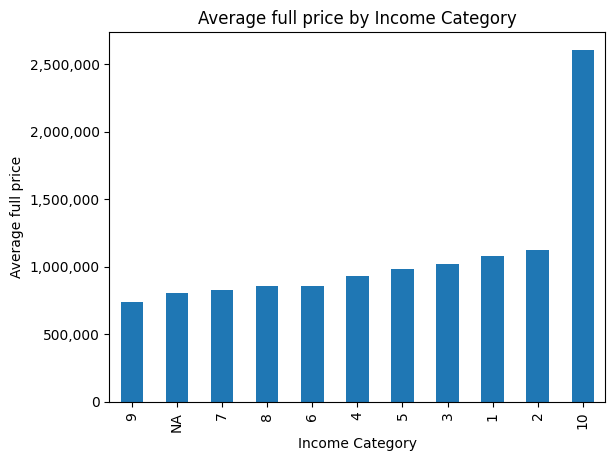

In [76]:
avg_fullprice_by_income.sort_values().plot(kind='bar')
plt.title('Average full price by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Average full price')
plt.gca().yaxis.set_major_formatter(formatter)

In [57]:
avg_monthlypayment_by_income = merged_data.groupby('income_cat')['payment_amount_per_period_x'].mean()
avg_monthlypayment_by_income

income_cat
1    257588.67
2    150766.50
3     87662.72
4     79631.71
5     80962.45
6     78498.79
7     64375.18
8     81376.13
9     61614.39
10   127330.00
NA    69865.39
Name: payment_amount_per_period_x, dtype: float64

Text(0, 0.5, 'Average Monthly Payment')

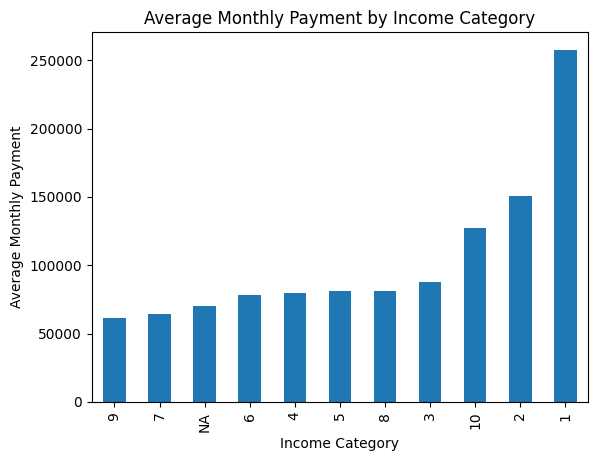

In [64]:
avg_monthlypayment_by_income.sort_values().plot(kind='bar')
plt.title('Average Monthly Payment by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Average Monthly Payment')

In [71]:
most_common_product_size_by_income = merged_data.groupby('income_cat')['product_size_x'].agg(lambda x: x.value_counts().idxmax())
most_common_product_size_by_income

income_cat
1     538L
2     208L
3     208L
4     208L
5     208L
6     538L
7     208L
8     208L
9     208L
10    538L
NA    538L
Name: product_size_x, dtype: object

In [55]:
merged_data.groupby('income_cat')['income_cat'].count()

income_cat
1       9
2     172
3     293
4     173
5     218
6     310
7     366
8     512
9     270
10      3
NA    577
Name: income_cat, dtype: int64

<ipython-input-45-a7d1d082abe4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income_cat', y='count', data=income_counts, palette='tab10')


Text(0, 0.5, 'Count')

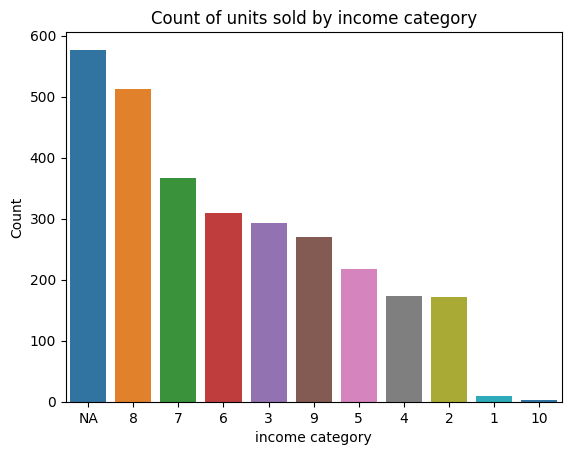

In [45]:
income_counts = merged_data['income_cat'].value_counts().reset_index()
income_counts.columns = ['income_cat', 'count']
sns.barplot(x='income_cat', y='count', data=income_counts, palette='tab10')
plt.title('Count of units sold by income category')
plt.xlabel('income category')
plt.ylabel('Count')

only 216 clients with missing income paid for it outright. the remaining 361 were on a pay as you go plan and 36 of those were repossessed almost 10% of the missing income field on a pay as you go plan was repossesed.

In [65]:
top_business_by_product_size = merged_data.groupby('product_x')['business_type'].agg(lambda x: x.value_counts().idxmax())
top_business_by_product_size

product_x
108L Freezer - Legacy                       Frozen Food Seller
108L Freezer - Outright (2021-2022 Aug)     Frozen Food Seller
108L Freezer Non-PAYGO                                  Others
108L Non-PAYGO                              Frozen Food Seller
119L Non-PAYGO                                          Others
1280L Freezer - Legacy                           Civil Servant
1280L Freezer - Outright (2021-2022 Aug)    Frozen Food Seller
1280L Non-PAYGO                             Frozen Food Seller
158L Freezer - Legacy                       Frozen Food Seller
158L Freezer - Outright (2021-2022 Aug)        Restaurants/Bar
158L Non-PAYGO                                Beverages Dealer
195L Icemaker Non-Paygo                       Ice Block Seller
208L Freezer - Legacy                       Frozen Food Seller
208L Freezer - Outright (2021-2022 Aug)     Frozen Food Seller
208L Non-PAYGO                                Beverages Dealer
538L Freezer - Legacy                       F

In [66]:
top_income_by_product = merged_data.groupby('product_x')['income_cat'].agg(lambda x: x.value_counts().idxmax())
top_income_by_product

product_x
108L Freezer - Legacy                       NA
108L Freezer - Outright (2021-2022 Aug)     NA
108L Freezer Non-PAYGO                       8
108L Non-PAYGO                               8
119L Non-PAYGO                               7
1280L Freezer - Legacy                       3
1280L Freezer - Outright (2021-2022 Aug)     8
1280L Non-PAYGO                              2
158L Freezer - Legacy                       NA
158L Freezer - Outright (2021-2022 Aug)      8
158L Non-PAYGO                               3
195L Icemaker Non-Paygo                      2
208L Freezer - Legacy                        8
208L Freezer - Outright (2021-2022 Aug)      8
208L Non-PAYGO                               2
538L Freezer - Legacy                       NA
538L Freezer - Outright (2021-2022 Aug)     NA
538L Non-PAYGO                              NA
540L Freezer - Legacy Custom                 8
700L Freezer - Legacy                       NA
Koolpaygo                                    8
Koo

In [48]:
merged_data_verified_income = merged_data[merged_data['income_cat'] != "NA"]

In [67]:
 top_income_by_product_size = merged_data_verified_income.groupby('product_x')['income_cat'].agg(lambda x: x.value_counts().idxmax())
top_income_by_product_size

product_x
108L Freezer - Legacy                       7
108L Freezer - Outright (2021-2022 Aug)     8
108L Freezer Non-PAYGO                      8
108L Non-PAYGO                              8
119L Non-PAYGO                              7
1280L Freezer - Legacy                      3
1280L Freezer - Outright (2021-2022 Aug)    8
1280L Non-PAYGO                             2
158L Freezer - Legacy                       8
158L Freezer - Outright (2021-2022 Aug)     8
158L Non-PAYGO                              3
195L Icemaker Non-Paygo                     2
208L Freezer - Legacy                       8
208L Freezer - Outright (2021-2022 Aug)     8
208L Non-PAYGO                              2
538L Freezer - Legacy                       8
538L Freezer - Outright (2021-2022 Aug)     8
538L Non-PAYGO                              3
540L Freezer - Legacy Custom                8
Koolpaygo                                   8
Koolpaygo - Non PAYG                        7
Koolpaygo 158L          

In [50]:
freezer_only = clients[clients['group_name'].str.contains('Freezer Alone', case=False)]

In [51]:
freezer_only

,account_qid,group_name,product,product_size,group_qid,billing_model,currency,down_payment,down_payment_days_included,minimum_payment,...,geolocation,gender,client_date_of_birth,occupation,business_type,business_size,monthly_generated_income,lead_source,product_use,Unnamed: 32
2,AC10221072,195L Koolboks Freezer Alone (Ice maker) - 11 M...,195L Icemaker Non-Paygo,195L,GR194809,PAYG,NGN,290150.00,30.00,62460.00,...,"6.55208,3.38862",Male,1982-06-22,Merchant (Trade),Ice Block Seller,Medium,"300,001 – 400,000",Referral,Domestic,NaN
6,AC10206267,538L Koolboks Freezer Alone - Outright - Leas...,538L Non-PAYGO,538L,GR260663,Direct_Sale,NGN,976790.00,NaN,NaN,...,"5.0,5.0",Male,1987-02-17,Civil Servant,Ice Block Seller,Medium,"300,001 – 400,000",Website Visit,Commercial,NaN
7,AC10206256,538L Koolboks Freezer Alone - Outright - Leas...,538L Non-PAYGO,538L,GR194828,Direct_Sale,NGN,1007000.00,NaN,NaN,...,"5.0,5.0",Male,1987-02-17,Civil Servant,Frozen Food Seller,Medium,"300,001 – 400,000",Website Visit,Commercial,NaN
8,AC10206170,208L Koolboks Freezer Alone - Outright - Lease...,208L Non-PAYGO,208L,GR194152,Direct_Sale,NGN,758000.00,NaN,NaN,...,"5.0,5.0",Male,1987-02-17,Merchant (Trade),Frozen Food Seller,Medium,"300,001 – 400,000",Website Visit,Commercial,NaN
9,AC10206044,195L Koolboks Freezer Alone (Ice maker) - Outr...,195L Icemaker Non-Paygo,195L,GR201750,Direct_Sale,NGN,804130.00,NaN,NaN,...,"5.0,5.0",Male,1987-02-17,Merchant (Trade),Ice Block Seller,Medium,"250,001 – 300,000",Website Visit,Commercial,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,AC6961449,158L Freezer Alone - Legacy,158L Freezer - Legacy,158L,GR165738,PAYG,NGN,50000.00,0.00,42083.00,...,NaN,Female,NaN,NaN,Civil Servant,NaN,"250,001 – 300,000",NaN,NaN,NaN
2198,AC8206420,108L Freezer Alone - 5 Months,108L Non-PAYGO,108L,GR189582,PAYG,NGN,32771.00,30.00,8000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2219,AC6961944,538L Legacy Freezer Alone (Biliaminu Adekola :...,538L Freezer - Legacy,538L,GR174904,PAYG,NGN,400000.00,30.00,96482.00,...,NaN,Female,NaN,NaN,Frozen Food Seller,NaN,"100,001 – 150,000",NaN,NaN,NaN
2592,AC6961549,208L Freezer Alone - Legacy,208L Freezer - Legacy,208L,GR165827,PAYG,NGN,92619.00,0.00,44941.00,...,"6.6351156,3.3603044",Female,NaN,Merchant (Trade),Restaurants/Bar,Large,"50,001 – 100,000",NaN,NaN,NaN


In [52]:
freezer_only_full_price = freezer_only.groupby('product_size')['full_price'].mean()
freezer_only_full_price.sort_values(ascending=False)

product_size
1160L   988530.00
1280L   959570.75
195L    732567.22
538L    712436.75
119L    614689.00
208L    469611.27
158L    396430.37
108L    157191.19
Name: full_price, dtype: float64

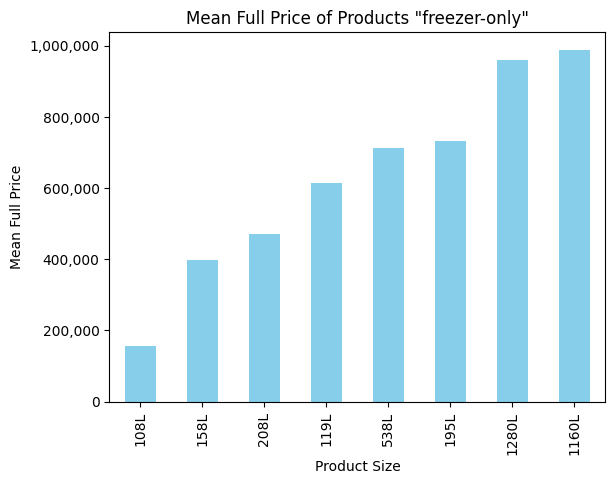

In [53]:
freezer_only_full_price.sort_values().plot(kind='bar', color='skyblue')
plt.title('Mean Full Price of Products "freezer-only"')
plt.xlabel('Product Size')
plt.ylabel('Mean Full Price')
plt.gca().yaxis.set_major_formatter(formatter)

Nigerian Prime rate: 26.25% <br>
April 2024 Nigeria inflation rate: 33.69% <br>
Nigeria Auto loans: ~33.50% 20% down 12-60months

With the inflation rate in Nigeria accelerating we're going to set the interest rate to 36% however this should be adjusted regularly based on the current market conditions. 36% annual would give us 3% per month